In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,BayesianRidge,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import operator
import datetime 
import copy
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
std=StandardScaler()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.set_option('display.max_rows', None)
covid = pd.read_csv("/content/drive/My Drive/ALL/all_patient")
covid.head()


ObservationDate Country/Region Province/State  ...  Confirmed  Recovered  Deaths
0      2020-01-22    Afghanistan            NaN  ...        0.0        0.0     0.0
1      2020-01-23    Afghanistan            NaN  ...        0.0        0.0     0.0
2      2020-01-24    Afghanistan            NaN  ...        0.0        0.0     0.0
3      2020-01-25    Afghanistan            NaN  ...        0.0        0.0     0.0
4      2020-01-26    Afghanistan            NaN  ...        0.0        0.0     0.0

[5 rows x 8 columns]

In [ ]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type:",covid.dtypes)

Size/Shape of the dataset (60075, 8)
Checking for null values:
 ObservationDate        0
Country/Region         0
Province/State     41625
Lat                    0
Long                   0
Confirmed            225
Recovered           3150
Deaths               225
dtype: int64
Checking Data-type: ObservationDate     object
Country/Region      object
Province/State      object
Lat                float64
Long               float64
Confirmed          float64
Recovered          float64
Deaths             float64
dtype: object


In [ ]:

covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [ ]:
#Grouping different types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":"sum","Deaths":'sum'})

In [ ]:

print("Basic Info")
print("Number of countries which infected: ", len(covid["Country/Region"].unique()))
print("Total num of confirmed cases: ",datewise["Confirmed"].iloc[-1])
print("Total num of recovered cases: ",datewise["Recovered"].iloc[-1])
print("Total num of deats: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total num of closed cases: ", (datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))
print("Approximate daily confirmed cases :", np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate daily recovered cases :", np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate daily Deaths  :", np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate confirmed cases per hour :", np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate recovered cases per hour :", np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate Deaths per hour :", np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Deaths in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])



Basic Info
Number of countries which infected:  188
Total num of confirmed cases:  26031410.0
Total num of recovered cases:  17291874.0
Total num of deats:  863028.0
Total number of Active Cases around the World:  7876508.0
Total num of closed cases:  18154902.0
Approximate daily confirmed cases : 115695.0
Approximate daily recovered cases : 76853.0
Approximate daily Deaths  : 3836.0
Approximate confirmed cases per hour : 4821.0
Approximate recovered cases per hour : 3202.0
Approximate Deaths per hour : 160.0
Number of Confirmed Cases in last 24 hours:  281768.0
Number of Recovered Cases in last 24 hours:  218638.0
Number of Deaths in last 24 hours:  6013.0


In [ ]:
print("Basic Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recoverd cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Deaths cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])

Basic Information
Total number of Confirmed cases around the world 26031410.0
Total number of Recoverd cases around the world 17291874.0
Total number of Deaths cases around the world 863028.0
Total number of Active cases around the world 7876508.0
Total number of Closed cases around the world 18154902.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

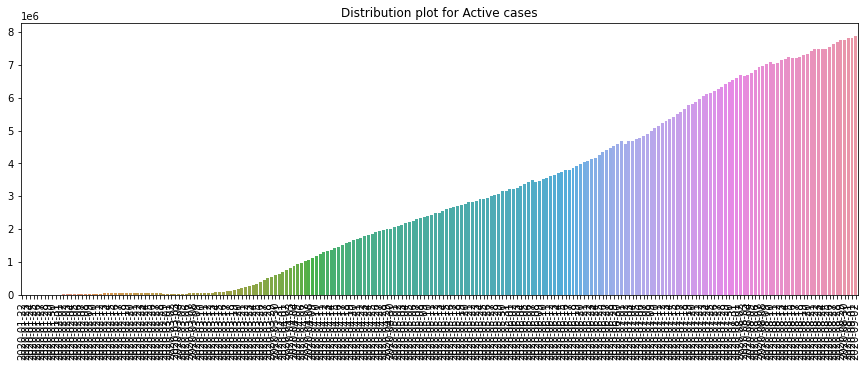

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for Active cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

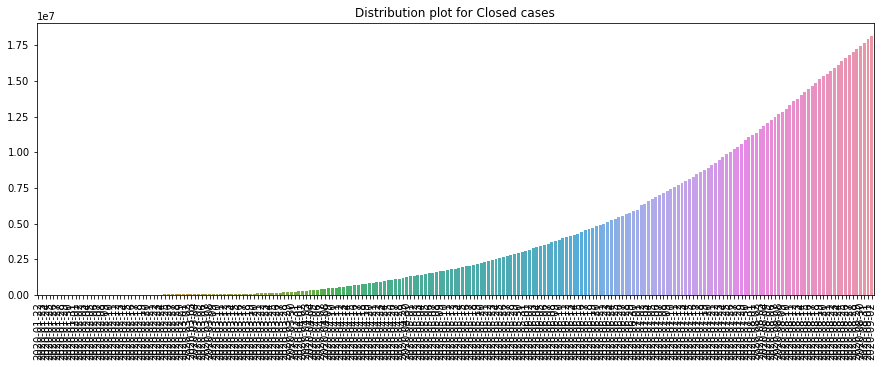

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot for Closed cases")
plt.xticks(rotation=90)

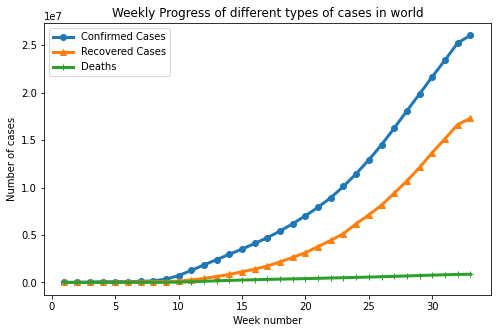

In [ ]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w = w+1
plt.figure(figsize = (8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3,marker="o", label='Confirmed Cases')
plt.plot(week_num,weekwise_recovered,linewidth=3,marker="^", label='Recovered Cases')
plt.plot(week_num,weekwise_deaths,linewidth=3,marker="+", label='Deaths')
plt.xlabel("Week number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases in world")
plt.legend()

Average increase in number of Confirmed cases everyday 115693.0
Average increase in number of Recovered cases everyday 76853.0
Average increase in number of Deaths cases everyday 3836.0


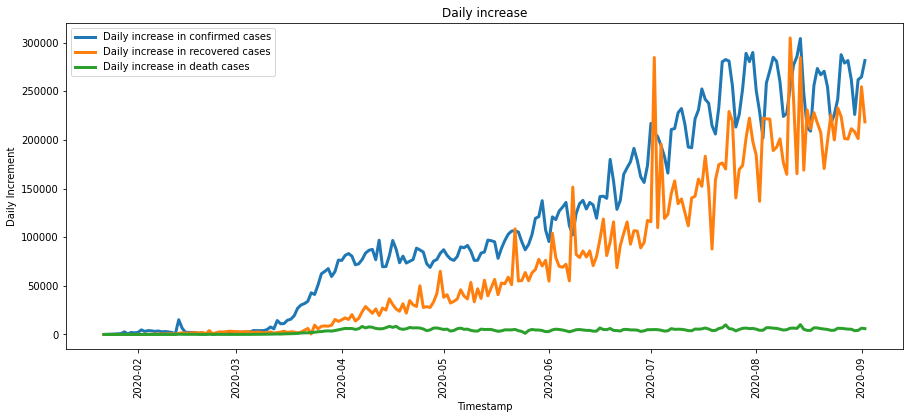

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth = 3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth = 3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth = 3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase")
plt.xticks(rotation=90)
plt.legend()

print("Average increase in number of Confirmed cases everyday",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths cases everyday",np.round(datewise["Deaths"].diff().fillna(0).mean()))

Text(0.5, 1.0, 'Weekly increase in Number of Death Cases')

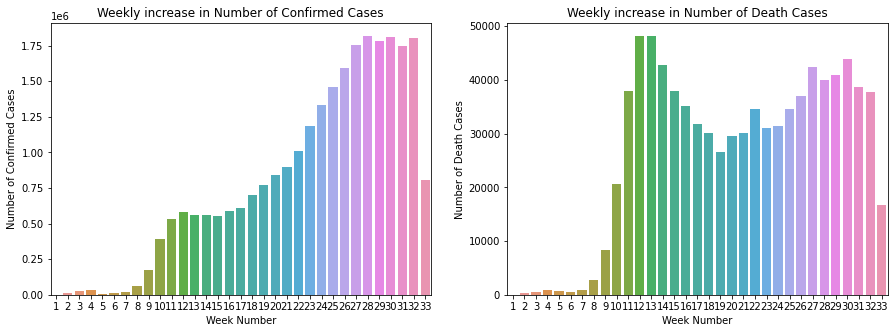

In [ ]:

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases")

In [ ]:
#Calculating the country wise mortality rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending =False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]
                         /countrywise["Confirmed"])*100

In [ ]:

countrywise

Confirmed  Recovered  ...  Mortality    Recovery
Country/Region                                          ...                       
US                                6113510.0  2231757.0  ...   3.037862   36.505330
Brazil                            3997865.0  3387309.0  ...   3.096153   84.727949
India                             3853406.0  2970492.0  ...   1.748479   77.087439
Russia                            1001965.0   819043.0  ...   1.733094   81.743674
Peru                               657129.0   480177.0  ...   4.423485   73.071954
Colombia                           633321.0   479567.0  ...   3.212431   75.722580
South Africa                       630595.0   553456.0  ...   2.281813   87.767267
Mexico                             610957.0   504541.0  ...  10.772608   82.582080
Spain                              479554.0   150376.0  ...   6.087740   31.357470
Argentina                          439172.0   315530.0  ...   2.076180   71.846566
Chile                              414739.0   387683.0  ...   2.735214   93.476379
Iran                               378752.0   326801.0  ...   5.754953   86.283637
United Kingdom                     340929.0     1742.0  ...  12.202541    0.510957
France                             331060.0    87418.0  ...   9.270827   26.405485
Bangladesh                         317528.0   211016.0  ...   1.370273   66.455872
Saudi Arabia                       317486.0   292510.0  ...   1.246039   92.133196
Pakistan                           297014.0   281925.0  ...   2.130539   94.919768
Turkey                             273301.0   246876.0  ...   2.364426   90.331173
Italy                              271515.0   208201.0  ...  13.073679   76.681215
Germany                            247411.0   219904.0  ...   3.767820   88.882063
Iraq                               242284.0   184205.0  ...   2.972132   76.028545
Philippines                        226440.0   158610.0  ...   1.599982   70.045045
Indonesia                          180646.0   129971.0  ...   4.215980   71.947898
Canada                             131941.0   116866.0  ...   6.959171   88.574439
Ukraine                            128833.0    60943.0  ...   2.099617   47.303874
Israel                             121464.0    97234.0  ...   0.797767   80.051703
Qatar                              119206.0   116111.0  ...   0.166938   97.403654
Bolivia                            117928.0    64074.0  ...   4.412014   54.333152
Ecuador                            115457.0   101867.0  ...   5.732870   88.229384
Kazakhstan                         106032.0    97371.0  ...   1.497661   91.831711
Egypt                               99280.0    74626.0  ...   5.500604   75.167204
Dominican Republic                  95627.0    69519.0  ...   1.845713   72.698087
Panama                              94084.0    67487.0  ...   2.157646   71.730581
China                               89953.0    84695.0  ...   5.254966   94.154725
Romania                             89891.0    38701.0  ...   4.139458   43.053253
Kuwait                              86478.0    78209.0  ...   0.618654   90.438030
Oman                                85928.0    81024.0  ...   0.801834   94.292896
Belgium                             85911.0    18490.0  ...  11.521225   21.522273
Sweden                              84532.0        0.0  ...   6.884967    0.000000
Guatemala                           75644.0    63688.0  ...   3.688330   84.194384
Netherlands                         74660.0     1282.0  ...   8.394053    1.717118
Belarus                             72141.0    70900.0  ...   0.957846   98.279758
United Arab Emirates                71540.0    62029.0  ...   0.540956   86.705340
Japan                               69619.0    58108.0  ...   1.906089   83.465721
Poland                              68517.0    47865.0  ...   3.032824   69.858575
Morocco                             65453.0    50357.0  ...   1.857822   76.936122
Honduras                            62526.0    111

Text(0.5, 1.0, 'Top15 countries as per number of death cases')

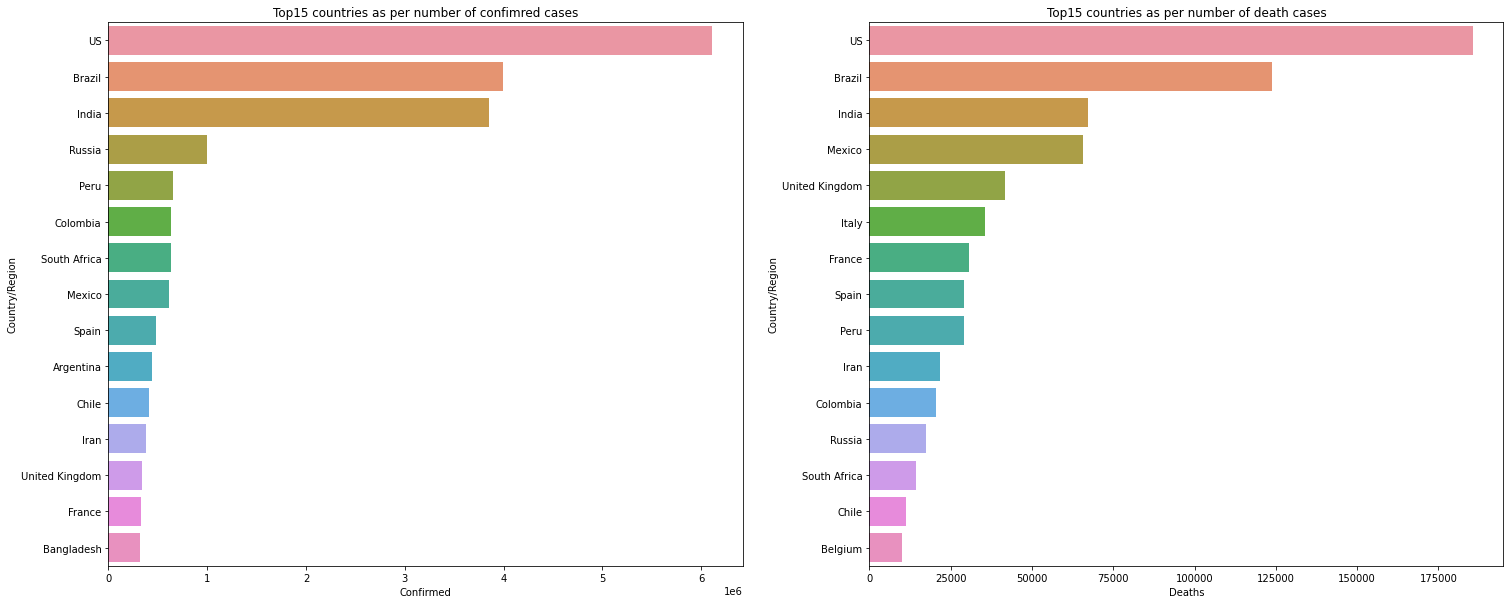

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top15 countries as per number of confimred cases")
sns.barplot(x = top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top15 countries as per number of death cases")

In [ ]:

#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"] = (datewise["Deaths"]/datewise["Confirmed"])*100 
datewise["Recovery Rate"] = (datewise["Recovered"]/datewise["Confirmed"])*100 
datewise["Active Cases"] = (datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]) 
datewise["Closed Cases"] = (datewise["Deaths"]+datewise["Recovered"])

In [ ]:

datewise


Confirmed   Recovered  ...  Active Cases  Closed Cases
ObservationDate                          ...                            
2020-01-22            555.0        28.0  ...         510.0          45.0
2020-01-23            654.0        30.0  ...         606.0          48.0
2020-01-24            941.0        36.0  ...         879.0          62.0
2020-01-25           1434.0        39.0  ...        1353.0          81.0
2020-01-26           2118.0        52.0  ...        2010.0         108.0
2020-01-27           2927.0        61.0  ...        2784.0         143.0
2020-01-28           5578.0       107.0  ...        5340.0         238.0
2020-01-29           6166.0       126.0  ...        5907.0         259.0
2020-01-30           8234.0       143.0  ...        7920.0         314.0
2020-01-31           9926.0       222.0  ...        9491.0         435.0
2020-02-01          12038.0       284.0  ...       11495.0         543.0
2020-02-02          16787.0       472.0  ...       15953.0         834.0
2020-02-03          19887.0       623.0  ...       18838.0        1049.0
2020-02-04          23898.0       852.0  ...       22554.0        1344.0
2020-02-05          27643.0      1124.0  ...       25955.0        1688.0
2020-02-06          30802.0      1487.0  ...       28681.0        2121.0
2020-02-07          34395.0      2011.0  ...       31665.0        2730.0
2020-02-08          37129.0      2616.0  ...       33707.0        3422.0
2020-02-09          40159.0      3244.0  ...       36009.0        4150.0
2020-02-10          42768.0      3946.0  ...       37809.0        4959.0
2020-02-11          44810.0      4683.0  ...       39014.0        5796.0
2020-02-12          45228.0      5150.0  ...       38960.0        6268.0
2020-02-13          60381.0      6295.0  ...       52715.0        7666.0
2020-02-14          66908.0      8058.0  ...       57327.0        9581.0
2020-02-15          69050.0      9395.0  ...       57989.0       11061.0
2020-02-16          71234.0     10865.0  ...       58599.0       12635.0
2020-02-17          73269.0     12583.0  ...       58818.0       14451.0
2020-02-18          75151.0     14352.0  ...       58791.0       16360.0
2020-02-19          75651.0     16121.0  ...       57407.0       18244.0
2020-02-20          76211.0     18177.0  ...       55786.0       20425.0
2020-02-21          76840.0     18890.0  ...       55698.0       21142.0
2020-02-22          78601.0     22886.0  ...       53256.0       25345.0
2020-02-23          78981.0     23394.0  ...       53117.0       25864.0
2020-02-24          79545.0     25227.0  ...       51688.0       27857.0
2020-02-25          80398.0     27905.0  ...       49783.0       30615.0
2020-02-26          81375.0     30384.0  ...       48220.0       33155.0
2020-02-27          82735.0     33277.0  ...       46644.0       36091.0
2020-02-28          84120.0     36711.0  ...       44536.0       39584.0
2020-02-29          86013.0     39782.0  ...       43289.0       42724.0
2020-03-01          88395.0     42716.0  ...       42683.0       45712.0
2020-03-02          90372.0     45602.0  ...       41685.0       48687.0
2020-03-03          92957.0     48228.0  ...       41569.0       51388.0
2020-03-04          95272.0     51170.0  ...       40847.0       54425.0
2020-03-05          98028.0     53796.0  ...       40884.0       57144.0
2020-03-06         102018.0     55865.0  ...       42693.0       59325.0
2020-03-07         106036.0     58359.0  ...       44118.0       61918.0
2020-03-08         109993.0     60694.0  ...       45496.0       64497.0
2020-03-09         113946.0     62493.0  ...       47466.0       66480.0
2020-03-10         118967.0     64404.0  ...       50296.0       68671.0
2020-03-11         126675.0     67002.0  ...       55062.0       71613.0
2020-03-12         132450.0     68324.0  ...       59209.0       73241.0
2020-03-13         146783.0     70251.0  ...       71118.0       75665.0
2020-03-14         157801.0     72622.0  ...       79345.0       78456.0
202

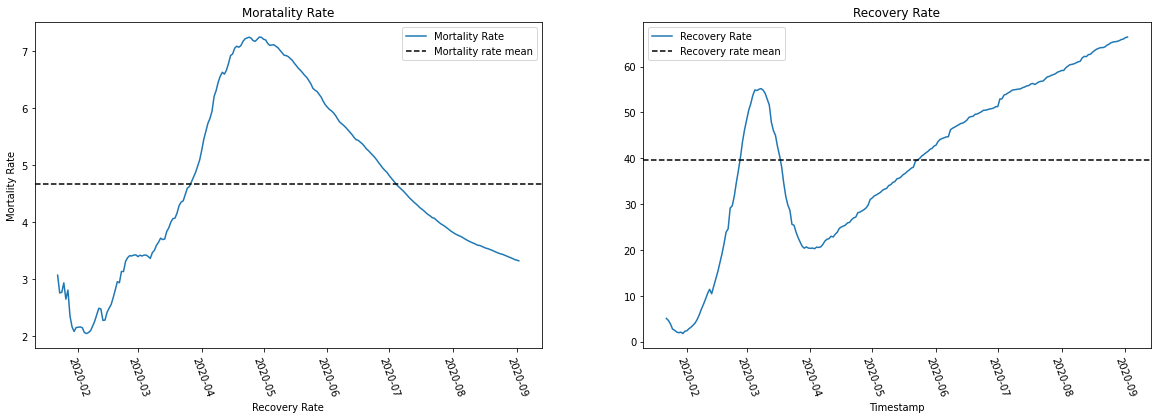

In [ ]:

# ploting mortality and Recovery rate
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
ax1.plot(datewise["Mortality Rate"],label="Mortality Rate")
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate")
ax1.set_title("Moratality Rate")
ax2.set_title("Recovery Rate")
ax1.set_xlabel("Timestamp")
ax2.set_xlabel("Timestamp")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Recovery Rate")
for tick in ax1.get_xticklabels():
    tick.set_rotation(-70)
for tick in ax2.get_xticklabels():
    tick.set_rotation(-70)
ax1.axhline(datewise["Mortality Rate"].mean(),label="Mortality rate mean", linestyle="--", color='black')
ax2.axhline(datewise["Recovery Rate"].mean(),label="Recovery rate mean", linestyle="--", color='black')
ax2.legend()
ax1.legend()

In [ ]:

print("Average mortality rate mean", datewise["Mortality Rate"].mean())
print("Average mortality rate median", datewise["Mortality Rate"].median())
print("Average recovery rate mean", datewise["Recovery Rate"].mean())
print("Average recovery rate median", datewise["Recovery Rate"].median())

Average mortality rate mean 4.655849209826536
Average mortality rate median 4.346019708353814
Average recovery rate mean 39.560966300460215
Average recovery rate median 42.51267170086619


In [ ]:

print("Average Increase in number of confirmed cases every day :",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average Increase in number of recovered cases every day :",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average Increase in number of death cases every day :",np.round(datewise["Deaths"].diff().fillna(0).mean()))

Average Increase in number of confirmed cases every day : 115693.0
Average Increase in number of recovered cases every day : 76853.0
Average Increase in number of death cases every day : 3836.0


Text(0.5, 0, 'Recovery (in Percentage)')

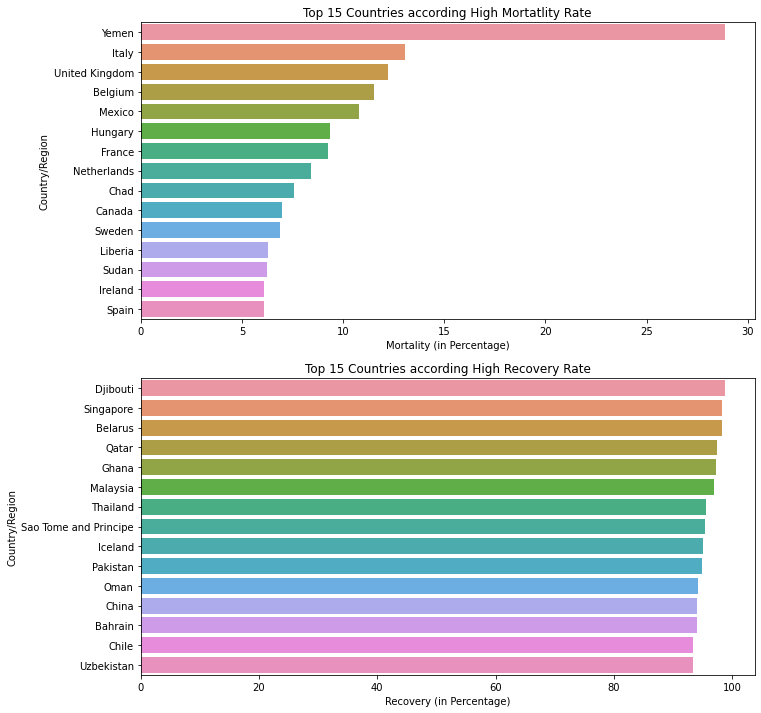

In [ ]:
fig, (ax1,ax2) = plt.subplots(2, 1 , figsize = (11, 12))
plot_mortality_rate = countrywise[countrywise["Confirmed"] > 500].sort_values(["Mortality"],ascending = False).head(15)
plot_recovery_rate = countrywise[countrywise["Confirmed"] > 500].sort_values(["Recovery"],ascending = False).head(15)
sns.barplot(x  = plot_mortality_rate["Mortality"],y = plot_mortality_rate.index , ax = ax1)
sns.barplot(x  = plot_recovery_rate["Recovery"],y = plot_recovery_rate.index , ax = ax2)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 0, 'Recovery (in Percentage)')

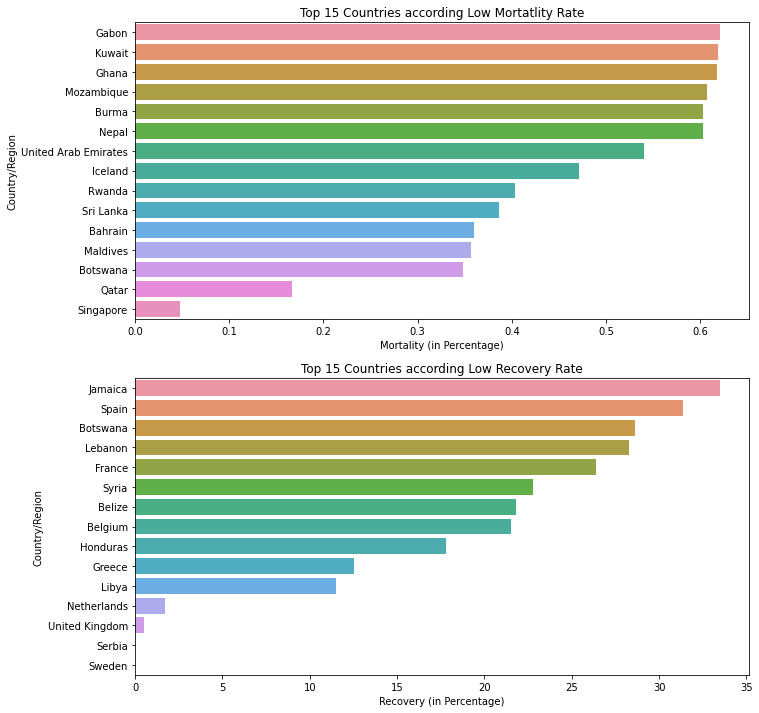

In [ ]:

fig, (ax1,ax2) = plt.subplots(2, 1 , figsize = (11, 12))
plot_mortality_rate = countrywise[countrywise["Confirmed"] > 500].sort_values(["Mortality"],ascending = False).tail(15)
plot_recovery_rate = countrywise[countrywise["Confirmed"] > 500].sort_values(["Recovery"],ascending = False).tail(15)
sns.barplot(x  = plot_mortality_rate["Mortality"],y = plot_mortality_rate.index , ax = ax1)
sns.barplot(x  = plot_recovery_rate["Recovery"],y = plot_recovery_rate.index , ax = ax2)
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Growth Factor of different Types of Cases Worldwide

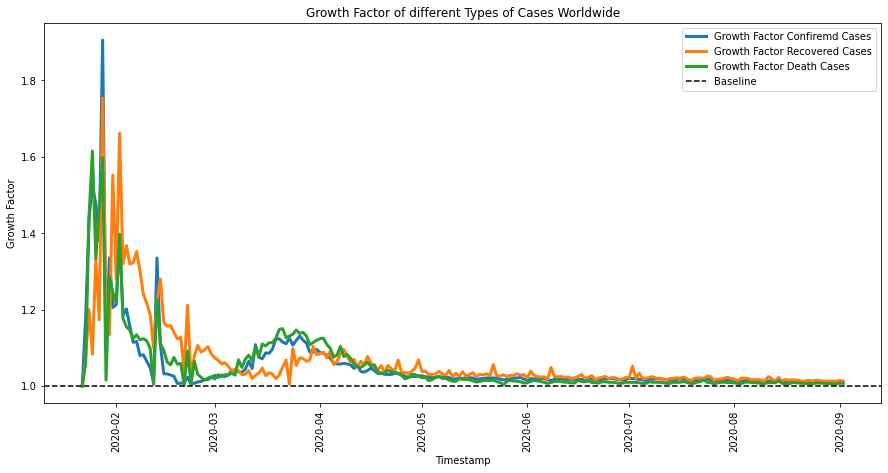

In [ ]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    daily_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]/datewise["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise["Recovered"].iloc[i+1]/datewise["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise["Deaths"].iloc[i+1]/datewise["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise.index,daily_increase_confirm,label="Growth Factor Confiremd Cases",linewidth=3)
plt.plot(datewise.index,daily_increase_recovered,label="Growth Factor Recovered Cases",linewidth=3)
plt.plot(datewise.index,daily_increase_deaths,label="Growth Factor Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Growth Factor")
plt.title("Growth Factor of different Types of Cases Worldwide")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.xticks(rotation=90)
plt.legend()


Time Taken for doubling the cases

In [ ]:
datewise["Days since"] = datewise.index-datewise.index.min()

In [ ]:
c=5000
double_days=[]
C=[]
while(1):
    double_days.append(datewise[datewise["Confirmed"]<=c].iloc[[-1]]["Days since"][0])
    C.append(c)
    c=c*2
    if(c<datewise["Confirmed"].max()):
        continue
    else:
        break

In [ ]:
C,double_days

([5000,
  10000,
  20000,
  40000,
  80000,
  160000,
  320000,
  640000,
  1280000,
  2560000,
  5120000,
  10240000,
  20480000],
 [Timedelta('5 days 00:00:00'),
  Timedelta('9 days 00:00:00'),
  Timedelta('12 days 00:00:00'),
  Timedelta('17 days 00:00:00'),
  Timedelta('33 days 00:00:00'),
  Timedelta('52 days 00:00:00'),
  Timedelta('59 days 00:00:00'),
  Timedelta('65 days 00:00:00'),
  Timedelta('74 days 00:00:00'),
  Timedelta('90 days 00:00:00'),
  Timedelta('120 days 00:00:00'),
  Timedelta('158 days 00:00:00'),
  Timedelta('202 days 00:00:00')])

In [ ]:
doubling_rate=pd.DataFrame(list(zip(C,double_days)),columns=("No. of cases","Days since first Case"))
doubling_rate["Number of days for doubling"]=doubling_rate["Days since first Case"].diff().fillna(doubling_rate["Days since first Case"])

In [ ]:

doubling_rate

No. of cases Days since first Case Number of days for doubling
0           5000                5 days                      5 days
1          10000                9 days                      4 days
2          20000               12 days                      3 days
3          40000               17 days                      5 days
4          80000               33 days                     16 days
5         160000               52 days                     19 days
6         320000               59 days                      7 days
7         640000               65 days                      6 days
8        1280000               74 days                      9 days
9        2560000               90 days                     16 days
10       5120000              120 days                     30 days
11      10240000              158 days                     38 days
12      20480000              202 days                     44 days

In [ ]:
#Data Analysis for India
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Actvie Cases:",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])


Confirmed    3853406.0
Recovered    2970492.0
Deaths         67376.0
Name: 2020-09-02 00:00:00, dtype: float64
Total Actvie Cases: 815538.0
Total Closed cases 3037868.0


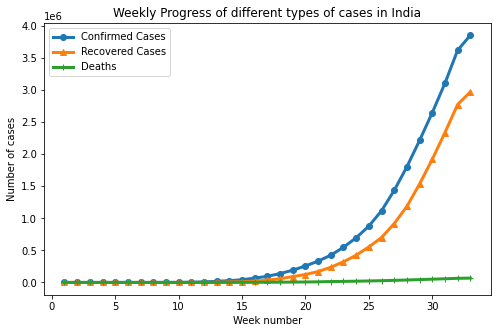

In [ ]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w = w+1
plt.figure(figsize = (8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3,marker="o", label='Confirmed Cases')
plt.plot(week_num_india,india_weekwise_recovered,linewidth=3,marker="^", label='Recovered Cases')
plt.plot(week_num_india,india_weekwise_deaths,linewidth=3,marker="+", label='Deaths')
plt.xlabel("Week number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases in India")
plt.legend()


In [ ]:
max_ind = datewise_india["Confirmed"].max()
china_data = covid[covid["Country/Region"]=="China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
spain_data = covid[covid["Country/Region"]=="Spain"]
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US = US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain = spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed cases to India")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of Confirmed cases to India")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed cases to India")
print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach number of Confirmed cases to India")

It took 217 days in India to reach 3853406.0 Confirmed Cases
It took 216 days in Italy to reach number of Confirmed cases to India
It took 181 days in US to reach number of Confirmed cases to India
It took 215 days in Spain to reach number of Confirmed cases to India
It took 225 days in China to reach number of Confirmed cases to India


In [ ]:
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml = datewise.iloc[int(datewise.shape[0]*0.90):]
model_scores = []

In [ ]:
X=countrywise[["Confirmed","Deaths"]]
X=std.fit_transform(X)

In [ ]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Silhouette Score Method')

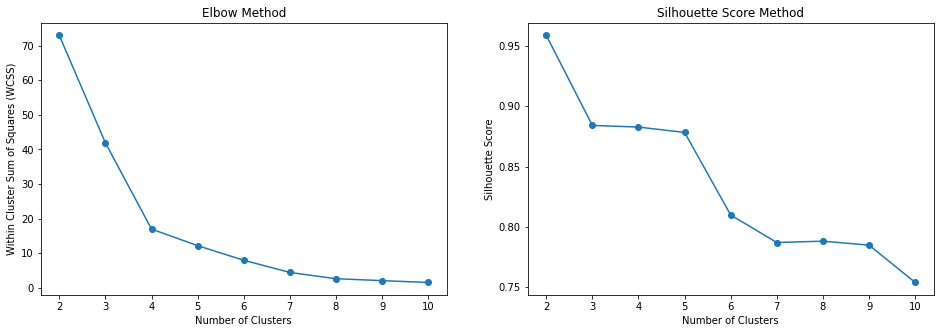

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

In [ ]:
clf_final=KMeans(n_clusters=4,init='k-means++',random_state=42)
clf_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
countrywise["Clusters"] = clf_final.predict(X)

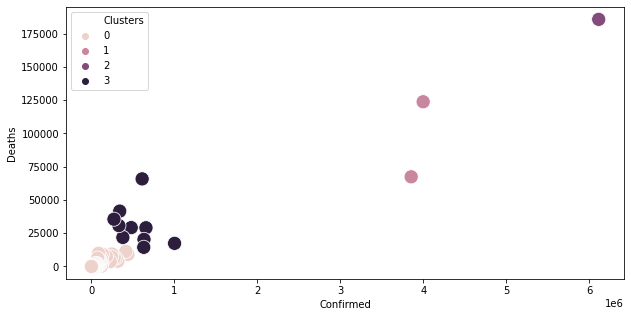

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=countrywise["Confirmed"],y=countrywise["Deaths"],hue=countrywise["Clusters"],s=200)

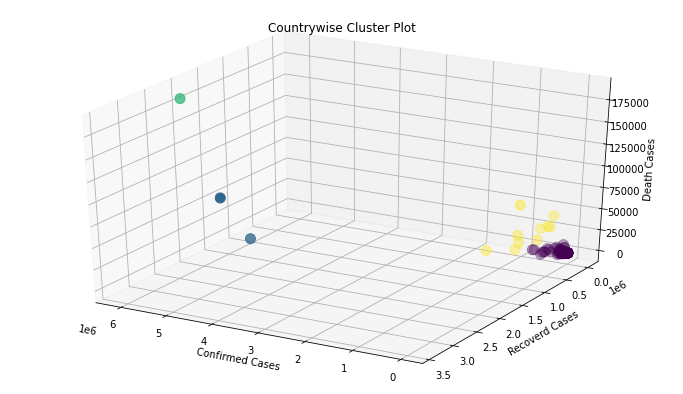

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(countrywise["Confirmed"],countrywise["Recovered"],countrywise["Deaths"], c=countrywise["Clusters"],
           marker='o',s=100)
ax.view_init(azim=120)
ax.set_xlabel('Confirmed Cases')
ax.set_ylabel('Recoverd Cases')
ax.set_zlabel('Death Cases')
plt.title("Countrywise Cluster Plot")
plt.show()


Cluster 0 is a set of countries which are very less affected, with comapritively low number of Confimed, Recoverd and Death Cases. e.g. Western Sahara etc.

Cluster 1 is set of countries which are severly affected, with really high number of Confirmed, Recovered and Death Cases. e.g.  Brazil,India.

Cluster 3 belongs to countries which are worst affected with high number of Confirmed Cases but having really good number of Recoverd Cases, with comparitively low number of Deaths as well. e.g. US etc.

Cluster 2 belongs to countries which are badly affected with high number of Confirmed Cases but having really good number of Recoverd Cases, but really high number of Deaths as well. e.g. South Africa, Russia etc.

In [ ]:
countrywise

Confirmed  Recovered  ...    Recovery  Clusters
Country/Region                                          ...                      
US                                6113510.0  2231757.0  ...   36.505330         2
Brazil                            3997865.0  3387309.0  ...   84.727949         1
India                             3853406.0  2970492.0  ...   77.087439         1
Russia                            1001965.0   819043.0  ...   81.743674         3
Peru                               657129.0   480177.0  ...   73.071954         3
Colombia                           633321.0   479567.0  ...   75.722580         3
South Africa                       630595.0   553456.0  ...   87.767267         3
Mexico                             610957.0   504541.0  ...   82.582080         3
Spain                              479554.0   150376.0  ...   31.357470         3
Argentina                          439172.0   315530.0  ...   71.846566         0
Chile                              414739.0   387683.0  ...   93.476379         0
Iran                               378752.0   326801.0  ...   86.283637         3
United Kingdom                     340929.0     1742.0  ...    0.510957         3
France                             331060.0    87418.0  ...   26.405485         3
Bangladesh                         317528.0   211016.0  ...   66.455872         0
Saudi Arabia                       317486.0   292510.0  ...   92.133196         0
Pakistan                           297014.0   281925.0  ...   94.919768         0
Turkey                             273301.0   246876.0  ...   90.331173         0
Italy                              271515.0   208201.0  ...   76.681215         3
Germany                            247411.0   219904.0  ...   88.882063         0
Iraq                               242284.0   184205.0  ...   76.028545         0
Philippines                        226440.0   158610.0  ...   70.045045         0
Indonesia                          180646.0   129971.0  ...   71.947898         0
Canada                             131941.0   116866.0  ...   88.574439         0
Ukraine                            128833.0    60943.0  ...   47.303874         0
Israel                             121464.0    97234.0  ...   80.051703         0
Qatar                              119206.0   116111.0  ...   97.403654         0
Bolivia                            117928.0    64074.0  ...   54.333152         0
Ecuador                            115457.0   101867.0  ...   88.229384         0
Kazakhstan                         106032.0    97371.0  ...   91.831711         0
Egypt                               99280.0    74626.0  ...   75.167204         0
Dominican Republic                  95627.0    69519.0  ...   72.698087         0
Panama                              94084.0    67487.0  ...   71.730581         0
China                               89953.0    84695.0  ...   94.154725         0
Romania                             89891.0    38701.0  ...   43.053253         0
Kuwait                              86478.0    78209.0  ...   90.438030         0
Oman                                85928.0    81024.0  ...   94.292896         0
Belgium                             85911.0    18490.0  ...   21.522273         0
Sweden                              84532.0        0.0  ...    0.000000         0
Guatemala                           75644.0    63688.0  ...   84.194384         0
Netherlands                         74660.0     1282.0  ...    1.717118         0
Belarus                             72141.0    70900.0  ...   98.279758         0
United Arab Emirates                71540.0    62029.0  ...   86.705340         0
Japan                               69619.0    58108.0  ...   83.465721         0
Poland                              68517.0    47865.0  ...   69.858575         0
Morocco                             65453.0    50357.0  ...   76.936122         0
Honduras                            62526.0    11147.0  ...   17.827784         0
Portugal        

**Comparison of India,China, UK, Italy, US and Rest of the world**

In [ ]:

India_data = covid[covid["Country/Region"] == "India"]
china_data = covid[covid["Country/Region"] == "China"]
UK_data = covid[covid["Country/Region"] == "United Kingdom"]
Italy_data = covid[covid["Country/Region"] == "Italy"]
US_data = covid[covid["Country/Region"] == "US"]
rest_of_world = covid[(covid["Country/Region"]!="United Kingdom")&(covid["Country/Region"]!="US")&
                        (covid["Country/Region"]!="Italy")&(covid["Country/Region"]!="China")&(covid["Country/Region"]!="India")]
datewise_india = India_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})                        
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_UK = UK_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_US = US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [ ]:
datewise_restofworld

Confirmed   Recovered    Deaths
ObservationDate                                  
2020-01-22              6.0         0.0       0.0
2020-01-23             10.0         0.0       0.0
2020-01-24             19.0         0.0       0.0
2020-01-25             26.0         0.0       0.0
2020-01-26             38.0         3.0       0.0
2020-01-27             45.0         3.0       0.0
2020-01-28             64.0         6.0       0.0
2020-01-29             74.0         6.0       0.0
2020-01-30             87.0         8.0       0.0
2020-01-31            112.0         8.0       0.0
2020-02-01            134.0         9.0       0.0
2020-02-02            143.0         9.0       1.0
2020-02-03            147.0         9.0       1.0
2020-02-04            167.0         9.0       1.0
2020-02-05            178.0         9.0       1.0
2020-02-06            190.0        10.0       1.0
2020-02-07            259.0        12.0       1.0
2020-02-08            285.0        20.0       1.0
2020-02-09            299.0        22.0       1.0
2020-02-10            383.0        25.0       1.0
2020-02-11            391.0        44.0       1.0
2020-02-12            435.0        64.0       1.0
2020-02-13            450.0        74.0       2.0
2020-02-14            513.0        77.0       2.0
2020-02-15            600.0        93.0       3.0
2020-02-16            684.0        96.0       4.0
2020-02-17            797.0       107.0       4.0
2020-02-18            902.0       132.0       5.0
2020-02-19            993.0       145.0       7.0
2020-02-20           1093.0       149.0      10.0
2020-02-21           1229.0       170.0      13.0
2020-02-22           1497.0       170.0      14.0
2020-02-23           1758.0       189.0      22.0
2020-02-24           2027.0       195.0      28.0
2020-02-25           2270.0       211.0      35.0
2020-02-26           2701.0       280.0      42.0
2020-02-27           3417.0       285.0      51.0
2020-02-28           4229.0       318.0      62.0
2020-02-29           5441.0       398.0      75.0
2020-03-01           6642.0       453.0      89.0
2020-03-02           8009.0       581.0     113.0
2020-03-03           9928.0       600.0     127.0
2020-03-04          11420.0       875.0     154.0
2020-03-05          13136.0      1072.0     173.0
2020-03-06          16072.0      1380.0     204.0
2020-03-07          18583.0      2203.0     235.0
2020-03-08          20823.0      2656.0     314.0
2020-03-09          22726.0      2937.0     376.0
2020-03-10          26273.0      3468.0     462.0
2020-03-11          30824.0      4282.0     582.0
2020-03-12          33012.0      4343.0     676.0
2020-03-13          43711.0      4581.0     905.0
2020-03-14          50117.0      4961.0    1111.0
2020-03-15          57106.0      6636.0    1348.0
2020-03-16          66499.0      7376.0    1613.0
2020-03-17          76253.0      9015.0    2013.0
2020-03-18          87859.0      9355.0    2337.0
2020-03-19         104041.0      9780.0    2895.0
2020-03-20         120921.0     11463.0    3611.0
2020-03-21         138982.0     13475.0    4376.0
2020-03-22         157268.0     18227.0    5235.0
2020-03-23         182112.0     18241.0    6309.0
2020-03-24         205246.0     25858.0    7454.0
2020-03-25         236078.0     30096.0    9048.0
2020-03-26         271390.0     36727.0   10748.0
2020-03-27         308308.0     44158.0   12511.0
2020-03-28         347074.0     50633.0   14404.0
2020-03-29         379273.0     57368.0   16311.0
2020-03-30         413821.0     67877.0   18472.0
2020-03-31         455468.0     78564.0   20887.0
2020-04-01         495736.0     90865.0   23783.0
2020-04-02         536465.0    105740.0   27081.0
2020-04-03         578052.0    118790.0   30286.0
2020-04-04         615983.0    132794.0   33453.0
2020-04-05         651244.0    142744.0   35910.0
2020-04-06         684124.0    155862.0   38836.0
2020-04-07         721355.0    175332.0   42773.0
2020-04-08         763675.0    199891.0   45775.0
2020-04-09        

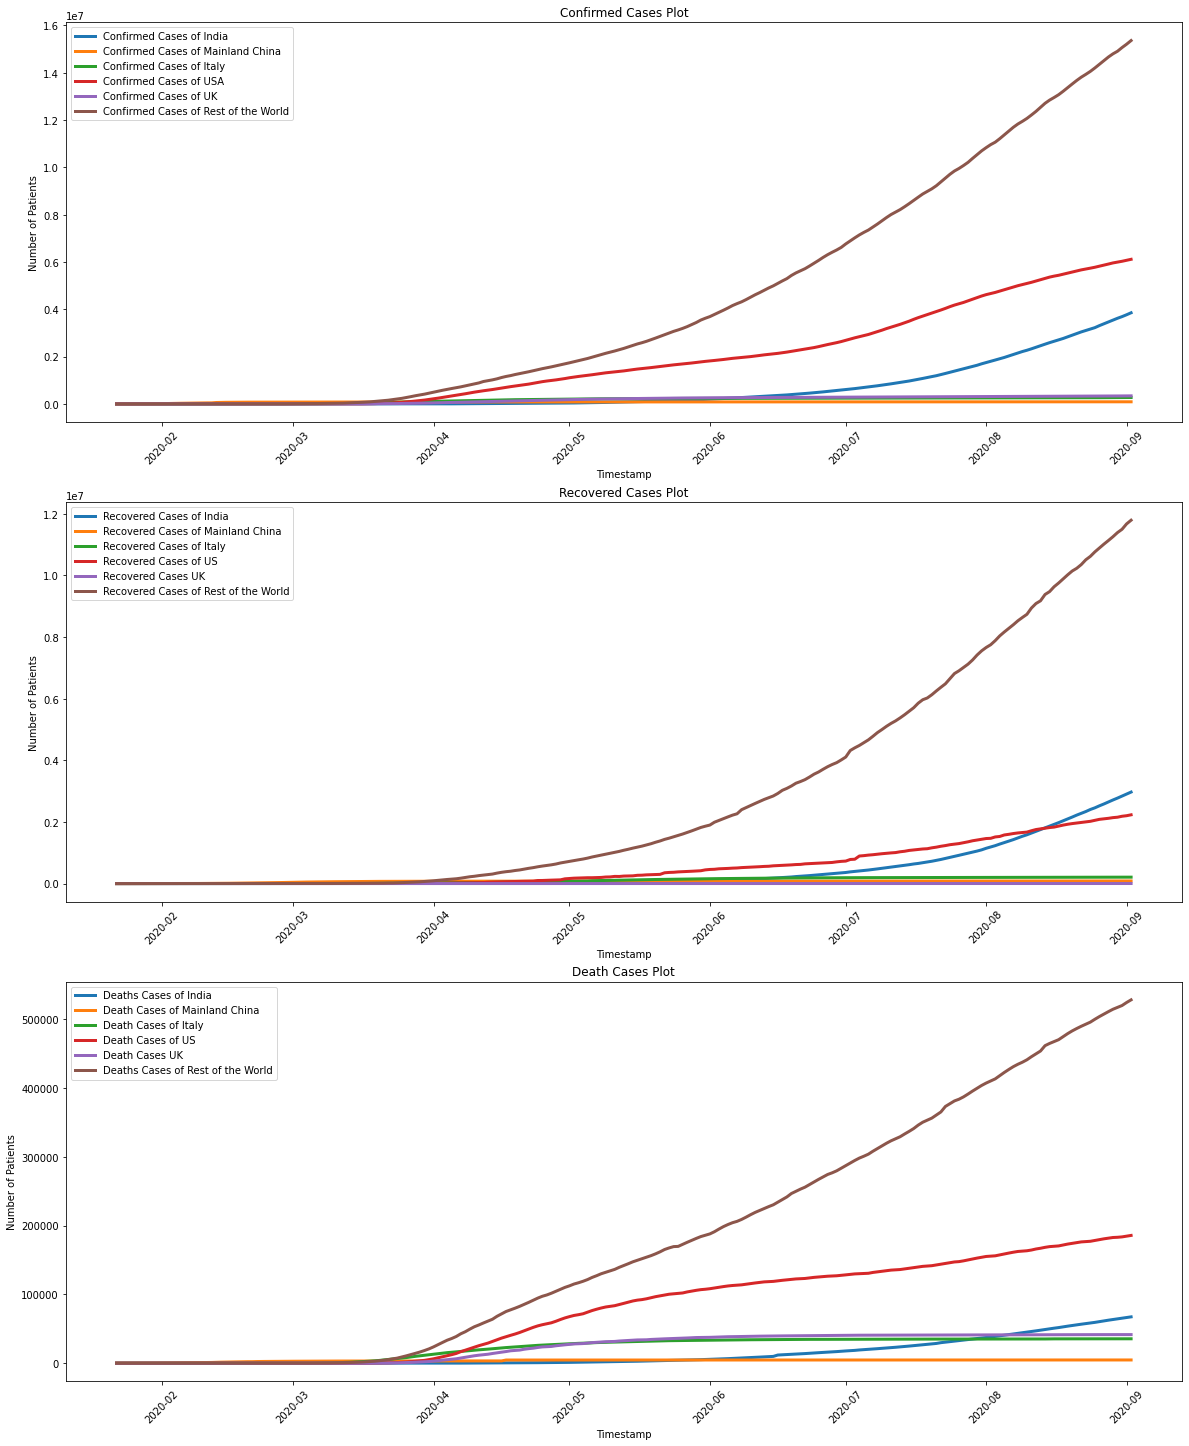

In [ ]:

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20,25))
ax1.plot(datewise_india["Confirmed"],label="Confirmed Cases of India",linewidth=3)
ax1.plot(datewise_china["Confirmed"],label="Confirmed Cases of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Confirmed"],label="Confirmed Cases of Italy",linewidth=3)
ax1.plot(datewise_US["Confirmed"],label="Confirmed Cases of USA",linewidth=3)
ax1.plot(datewise_UK["Confirmed"],label="Confirmed Cases of UK",linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"],label="Confirmed Cases of Rest of the World",linewidth=3)
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax2.plot(datewise_india["Recovered"],label="Recovered Cases of India",linewidth=3)    
ax2.plot(datewise_china["Recovered"],label="Recovered Cases of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovered"],label="Recovered Cases of Italy",linewidth=3)
ax2.plot(datewise_US["Recovered"],label="Recovered Cases of US",linewidth=3)
ax2.plot(datewise_UK["Recovered"],label="Recovered Cases UK",linewidth=3)
ax2.plot(datewise_restofworld["Recovered"],label="Recovered Cases of Rest of the World",linewidth=3)
ax2.set_title("Recovered Cases Plot")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
ax3.plot(datewise_india["Deaths"],label="Deaths Cases of India",linewidth=3)    
ax3.plot(datewise_china["Deaths"],label='Death Cases of Mainland China',linewidth=3)
ax3.plot(datewise_Italy["Deaths"],label='Death Cases of Italy',linewidth=3)
ax3.plot(datewise_US["Deaths"],label='Death Cases of US',linewidth=3)
ax3.plot(datewise_UK["Deaths"],label='Death Cases UK',linewidth=3)
ax3.plot(datewise_restofworld["Deaths"],label="Deaths Cases of Rest of the World",linewidth=3)
ax3.set_title("Death Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

In [ ]:
datewise

Confirmed   Recovered  ...  Days since  Days Since
ObservationDate                          ...                        
2020-01-22            555.0        28.0  ...      0 days           0
2020-01-23            654.0        30.0  ...      1 days           1
2020-01-24            941.0        36.0  ...      2 days           2
2020-01-25           1434.0        39.0  ...      3 days           3
2020-01-26           2118.0        52.0  ...      4 days           4
2020-01-27           2927.0        61.0  ...      5 days           5
2020-01-28           5578.0       107.0  ...      6 days           6
2020-01-29           6166.0       126.0  ...      7 days           7
2020-01-30           8234.0       143.0  ...      8 days           8
2020-01-31           9926.0       222.0  ...      9 days           9
2020-02-01          12038.0       284.0  ...     10 days          10
2020-02-02          16787.0       472.0  ...     11 days          11
2020-02-03          19887.0       623.0  ...     12 days          12
2020-02-04          23898.0       852.0  ...     13 days          13
2020-02-05          27643.0      1124.0  ...     14 days          14
2020-02-06          30802.0      1487.0  ...     15 days          15
2020-02-07          34395.0      2011.0  ...     16 days          16
2020-02-08          37129.0      2616.0  ...     17 days          17
2020-02-09          40159.0      3244.0  ...     18 days          18
2020-02-10          42768.0      3946.0  ...     19 days          19
2020-02-11          44810.0      4683.0  ...     20 days          20
2020-02-12          45228.0      5150.0  ...     21 days          21
2020-02-13          60381.0      6295.0  ...     22 days          22
2020-02-14          66908.0      8058.0  ...     23 days          23
2020-02-15          69050.0      9395.0  ...     24 days          24
2020-02-16          71234.0     10865.0  ...     25 days          25
2020-02-17          73269.0     12583.0  ...     26 days          26
2020-02-18          75151.0     14352.0  ...     27 days          27
2020-02-19          75651.0     16121.0  ...     28 days          28
2020-02-20          76211.0     18177.0  ...     29 days          29
2020-02-21          76840.0     18890.0  ...     30 days          30
2020-02-22          78601.0     22886.0  ...     31 days          31
2020-02-23          78981.0     23394.0  ...     32 days          32
2020-02-24          79545.0     25227.0  ...     33 days          33
2020-02-25          80398.0     27905.0  ...     34 days          34
2020-02-26          81375.0     30384.0  ...     35 days          35
2020-02-27          82735.0     33277.0  ...     36 days          36
2020-02-28          84120.0     36711.0  ...     37 days          37
2020-02-29          86013.0     39782.0  ...     38 days          38
2020-03-01          88395.0     42716.0  ...     39 days          39
2020-03-02          90372.0     45602.0  ...     40 days          40
2020-03-03          92957.0     48228.0  ...     41 days          41
2020-03-04          95272.0     51170.0  ...     42 days          42
2020-03-05          98028.0     53796.0  ...     43 days          43
2020-03-06         102018.0     55865.0  ...     44 days          44
2020-03-07         106036.0     58359.0  ...     45 days          45
2020-03-08         109993.0     60694.0  ...     46 days          46
2020-03-09         113946.0     62493.0  ...     47 days          47
2020-03-10         118967.0     64404.0  ...     48 days          48
2020-03-11         126675.0     67002.0  ...     49 days          49
2020-03-12         132450.0     68324.0  ...     50 days          50
2020-03-13         146783.0     70251.0  ...     51 days          51
2020-03-14         157801.0     72622.0  ...     52 days          52
2020-03-15         169032.0     76032.0  ...     53 days          53
2020-03-16         183677.0     78086.0  ...     54 days          54
2020-03-17         199391.0     80838.0  ...     55 days          55
2020-03-18      

Mortality and recovery rate comparison

In [ ]:
datewise_india["Mortality"] = (datewise_india["Deaths"]/datewise_india["Confirmed"])*100
datewise_china["Mortality"] = (datewise_china["Deaths"]/datewise_china["Confirmed"])*100
datewise_US["Mortality"] = (datewise_US["Deaths"]/datewise_US["Confirmed"])*100
datewise_UK["Mortality"] = (datewise_UK["Deaths"]/datewise_UK["Confirmed"])*100
datewise_Italy["Mortality"] = (datewise_Italy["Deaths"]/datewise_Italy["Confirmed"])*100
datewise_restofworld["Mortality"] = (datewise["Deaths"]/datewise["Confirmed"])*100


In [ ]:
datewise_india["Recovery"] = (datewise_india["Recovered"]/datewise_india["Confirmed"])*100
datewise_china["Recovery"] = (datewise_china["Recovered"]/datewise_china["Confirmed"])*100
datewise_US["Recovery"] = (datewise_US["Recovered"]/datewise_US["Confirmed"])*100
datewise_UK["Recovery"] = (datewise_UK["Recovered"]/datewise_UK["Confirmed"])*100
datewise_Italy["Recovery"] = (datewise_Italy["Recovered"]/datewise_Italy["Confirmed"])*100
datewise_restofworld["Recovery"] = (datewise["Recovered"]/datewise["Confirmed"])*100


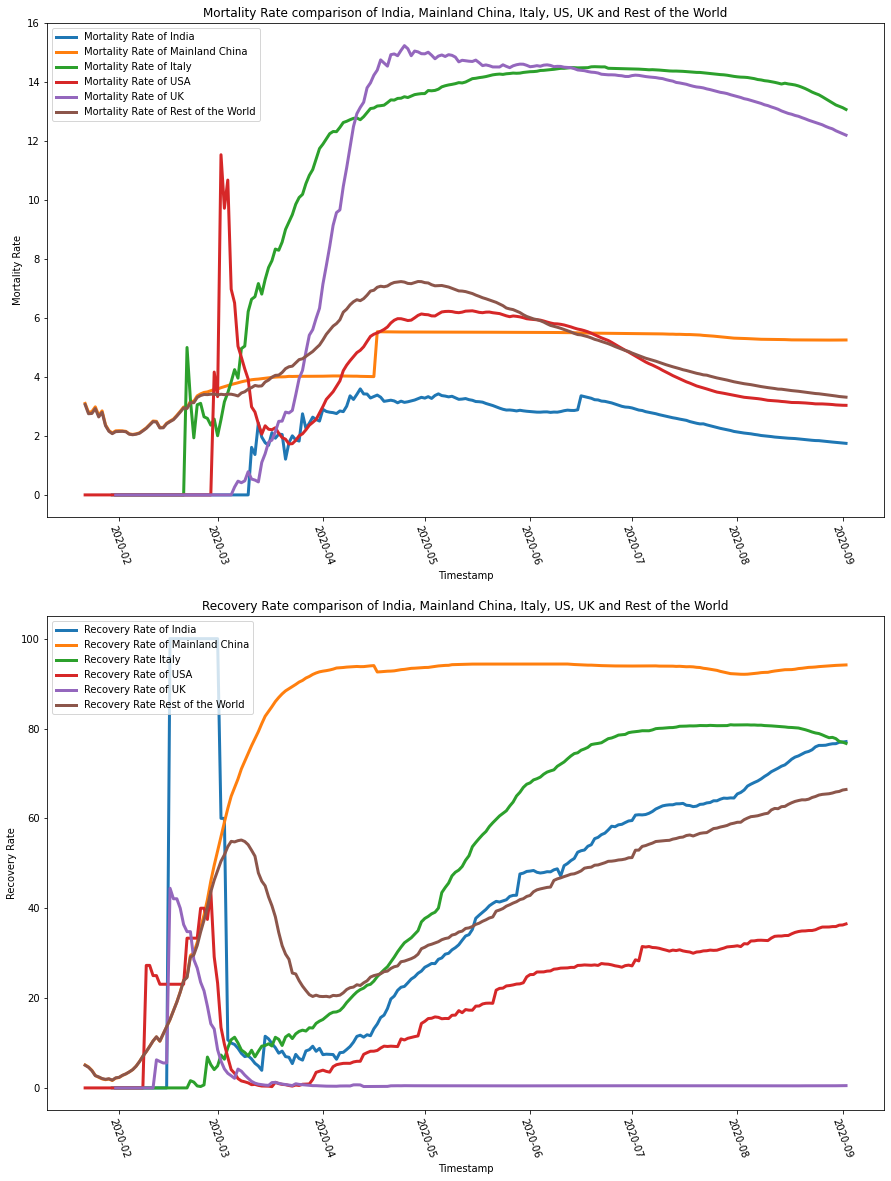

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,20))
ax1.plot(datewise_india["Mortality"],label="Mortality Rate of India",linewidth=3)
ax1.plot(datewise_china["Mortality"],label="Mortality Rate of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Mortality"],label="Mortality Rate of Italy",linewidth=3)
ax1.plot(datewise_US["Mortality"],label="Mortality Rate of USA",linewidth=3)
ax1.plot(datewise_UK["Mortality"],label="Mortality Rate of UK",linewidth=3)
ax1.plot(datewise_restofworld["Mortality"],label="Mortality Rate of Rest of the World",linewidth=3)
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Mortality Rate comparison of India, Mainland China, Italy, US, UK and Rest of the World")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(-70)
ax2.plot(datewise_india["Recovery"],label="Recovery Rate of India",linewidth=3)
ax2.plot(datewise_china["Recovery"],label="Recovery Rate of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovery"],label="Recovery Rate Italy",linewidth=3)
ax2.plot(datewise_US["Recovery"],label="Recovery Rate of USA",linewidth=3)
ax2.plot(datewise_UK["Recovery"],label="Recovery Rate of UK",linewidth=3)
ax2.plot(datewise_restofworld["Recovery"],label="Recovery Rate Rest of the World",linewidth=3)
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Recovery Rate comparison of India, Mainland China, Italy, US, UK and Rest of the World")
ax2.legend()
for tick in ax2.get_xticklabels():
  tick.set_rotation(-70)


2 sept 2020



**Future Predictions**

In [ ]:
df = copy.deepcopy(covid);
date_lst  = df.ObservationDate.unique();
date_dict = {}
#len(date_lst) # 70 dates
for i in range(len(date_lst)):
    df_temp = df.loc[df['ObservationDate'] == date_lst[i]];
    date_dict[date_lst[i]] = df_temp;


In [ ]:
date_tot_tup_dict = {};
for date, df in date_dict.items():
    tup_temp = (df['Confirmed'].sum(), df['Deaths'].sum(), df['Recovered'].sum())
    date_tot_tup_dict[date] = tup_temp;


In [ ]:
df_date_tots = pd.DataFrame(date_tot_tup_dict);
df_date_tots = df_date_tots.transpose();
df_date_tots.columns = ['Confirmed', 'Deaths', 'Recovered'];
print(df_date_tots)


             Confirmed    Deaths   Recovered
2020-01-22       555.0      17.0        28.0
2020-01-23       654.0      18.0        30.0
2020-01-24       941.0      26.0        36.0
2020-01-25      1434.0      42.0        39.0
2020-01-26      2118.0      56.0        52.0
2020-01-27      2927.0      82.0        61.0
2020-01-28      5578.0     131.0       107.0
2020-01-29      6166.0     133.0       126.0
2020-01-30      8234.0     171.0       143.0
2020-01-31      9927.0     213.0       222.0
2020-02-01     12038.0     259.0       284.0
2020-02-02     16787.0     362.0       472.0
2020-02-03     19887.0     426.0       623.0
2020-02-04     23898.0     492.0       852.0
2020-02-05     27643.0     564.0      1124.0
2020-02-06     30802.0     634.0      1487.0
2020-02-07     34395.0     719.0      2011.0
2020-02-08     37129.0     806.0      2616.0
2020-02-09     40159.0     906.0      3244.0
2020-02-10     42768.0    1013.0      3946.0
2020-02-11     44810.0    1113.0      4683.0
2020-02-12

In [ ]:
df_date_tots['Closed Cases'] = df_date_tots['Deaths'] + df_date_tots['Recovered'];
df_date_tots['Active Cases'] = df_date_tots['Confirmed'] - df_date_tots['Closed Cases']
print(df_date_tots)

             Confirmed    Deaths   Recovered  Closed Cases  Active Cases
2020-01-22       555.0      17.0        28.0          45.0         510.0
2020-01-23       654.0      18.0        30.0          48.0         606.0
2020-01-24       941.0      26.0        36.0          62.0         879.0
2020-01-25      1434.0      42.0        39.0          81.0        1353.0
2020-01-26      2118.0      56.0        52.0         108.0        2010.0
2020-01-27      2927.0      82.0        61.0         143.0        2784.0
2020-01-28      5578.0     131.0       107.0         238.0        5340.0
2020-01-29      6166.0     133.0       126.0         259.0        5907.0
2020-01-30      8234.0     171.0       143.0         314.0        7920.0
2020-01-31      9927.0     213.0       222.0         435.0        9492.0
2020-02-01     12038.0     259.0       284.0         543.0       11495.0
2020-02-02     16787.0     362.0       472.0         834.0       15953.0
2020-02-03     19887.0     426.0       623.0       

**Part 2 - Prediction Using Linear Regression
To make our data to be compatible with sklearn format, create a new column called “Days since” which tracks the number of days since the initial date.**

In [ ]:
days_since_lst = [];
for i in range(len(date_lst)):
    days_since_lst.append(i);
df_date_tots["Days Since:"] = days_since_lst;
df_date_tots = df_date_tots[["Days Since:", "Confirmed", "Deaths", "Recovered", "Active Cases", "Closed Cases"]];
print(df_date_tots)


            Days Since:   Confirmed  ...  Active Cases  Closed Cases
2020-01-22            0       555.0  ...         510.0          45.0
2020-01-23            1       654.0  ...         606.0          48.0
2020-01-24            2       941.0  ...         879.0          62.0
2020-01-25            3      1434.0  ...        1353.0          81.0
2020-01-26            4      2118.0  ...        2010.0         108.0
2020-01-27            5      2927.0  ...        2784.0         143.0
2020-01-28            6      5578.0  ...        5340.0         238.0
2020-01-29            7      6166.0  ...        5907.0         259.0
2020-01-30            8      8234.0  ...        7920.0         314.0
2020-01-31            9      9927.0  ...        9492.0         435.0
2020-02-01           10     12038.0  ...       11495.0         543.0
2020-02-02           11     16787.0  ...       15953.0         834.0
2020-02-03           12     19887.0  ...       18838.0        1049.0
2020-02-04           13     23898.

In [ ]:

from sklearn.model_selection import train_test_split, RandomizedSearchCV;
from sklearn.preprocessing import StandardScaler;
X = np.array(df_date_tots["Confirmed"])#.reshape(-1,1)
# X is the world cases array
y = np.array(df_date_tots["Days Since:"]).reshape(-1,1)
# y is the day count array associated with the world cases array

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15,shuffle = False)
# shuffle = False lets the data be split in order

In [ ]:
lin_model = LinearRegression(normalize = True, fit_intercept = False);
lin_model.fit(y_train, X_train);
test_lin_pred = lin_model.predict(y_test)
lin_pred = lin_model.predict(y)

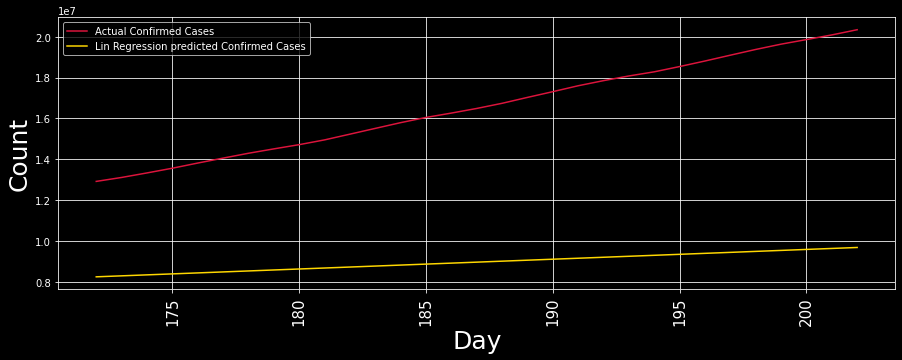

MAE: 7595848.668577207
MSE: 61016326511225.17
r2_score: -331.2300380259948
RMSE: 7811294.80375854


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         test_lin_pred,
         label = "Lin Regression predicted Confirmed Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error (test_lin_pred, X_test))
print('MSE:', mean_squared_error  (test_lin_pred, X_test))
print('r2_score:', r2_score  (test_lin_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_lin_pred, X_test)))

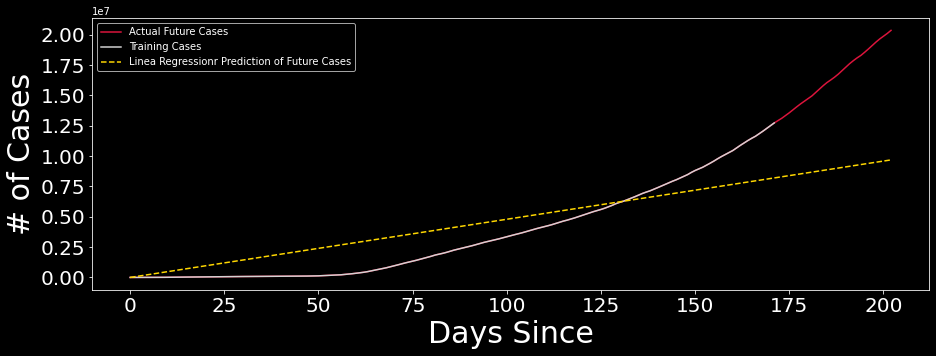

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Future Cases',
         color = 'crimson')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
plt.plot(y,
         lin_pred,
         label = 'Linea Regressionr Prediction of Future Cases',
         linestyle = "dashed",
         color = 'gold')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


**Polynomial Regression**

In [ ]:
poly = PolynomialFeatures(degree=5)
poly_y_train = poly.fit_transform(y_train)
poly_y_test  = poly.fit_transform(y_test)
poly_y = poly.fit_transform(y)

In [ ]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_y_train, X_train)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

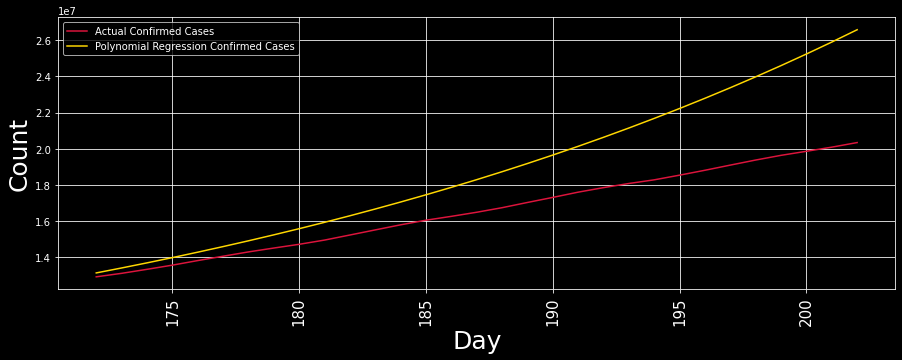

MAE: 2291116.820981283
MSE: 8392803916603.991
r2_score: 0.47312765381383337
RMSE: 2897033.640916859


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         test_linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(test_linear_pred, X_test))
print('MSE:',mean_squared_error(test_linear_pred, X_test))
print('r2_score:',r2_score(test_linear_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_linear_pred, X_test)))

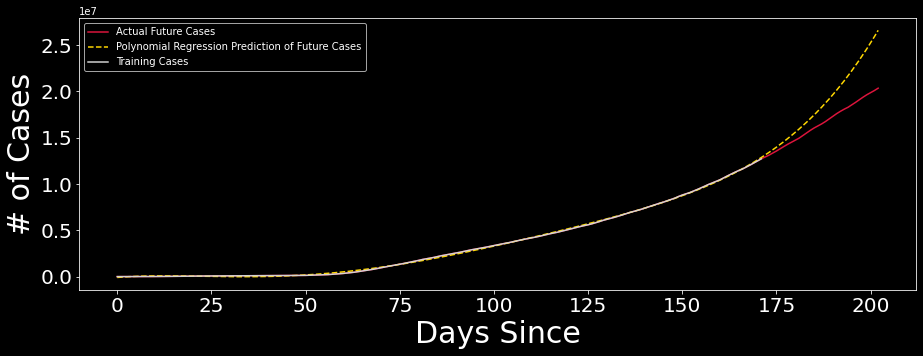

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Future Cases',
         color = 'crimson')

plt.plot(y,
         linear_pred,
         label = 'Polynomial Regression Prediction of Future Cases',
         linestyle = "dashed",
         color = 'gold')

plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**Ridge Regression**

In [ ]:
tol      = [1e-4, 1e-3, 1e-2]
alpha_1  = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2  = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2' : alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2' : lambda_2 }

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

bayesian_search.fit(y_train, X_train);

print(bayesian_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'tol': 0.001, 'lambda_2': 1e-05, 'lambda_1': 1e-05, 'alpha_2': 1e-06, 'alpha_1': 1e-06}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.5s finished


In [ ]:
y_test_ridge_pred = bayesian_search.predict(y_test);
y_ridge_pred = bayesian_search.predict(y);

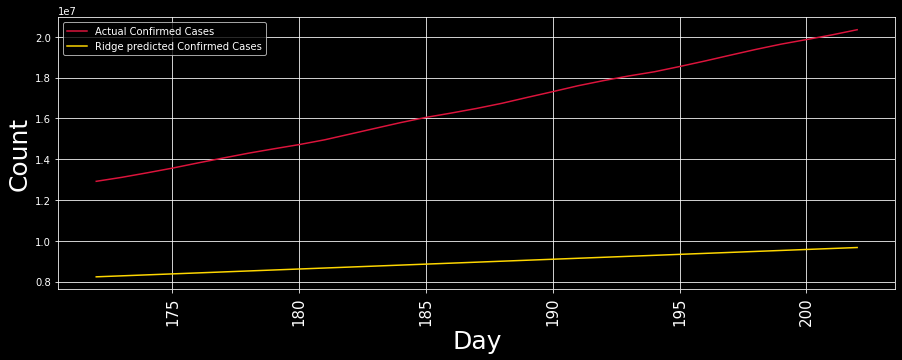

MAE: 7603551.139418214
MSE: 61134741518252.13
r2_score: -332.44786155692174
RMSE: 7818870.85954565


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         y_test_ridge_pred,
         label = "Ridge predicted Confirmed Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error (y_test_ridge_pred, X_test))
print('MSE:', mean_squared_error  (y_test_ridge_pred, X_test))
print('r2_score:', r2_score  (y_test_ridge_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (y_test_ridge_pred, X_test)))


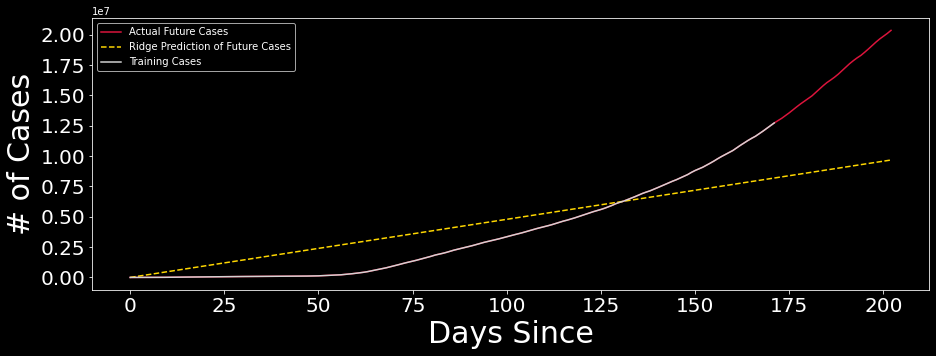

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Future Cases',
         color = 'crimson')
plt.plot(y,
         y_ridge_pred,
         label = 'Ridge Prediction of Future Cases',
         linestyle = "dashed",
         color = 'gold')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**Polynomial Ridge Regression**

In [ ]:
bayesian_search_poly = RandomizedSearchCV(bayesian,bayesian_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)
                                     
                                    

In [ ]:
bayesian_search_poly.fit(poly_y_train, X_train);
print(bayesian_search_poly.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'tol': 0.0001, 'lambda_2': 1e-07, 'lambda_1': 1e-07, 'alpha_2': 1e-06, 'alpha_1': 0.0001}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished


In [ ]:
bayesian_poly_confirmed = bayesian_search_poly.best_estimator_
test_poly_bayesian_pred = bayesian_poly_confirmed.predict(poly_y_test)
bayesian_poly_pred = bayesian_poly_confirmed.predict(poly_y)

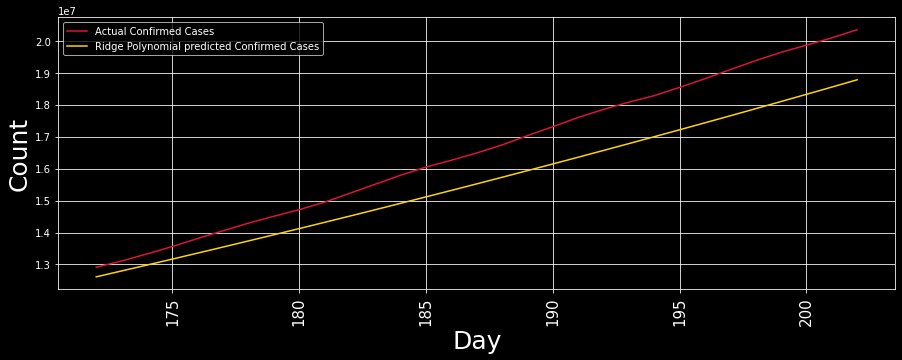

MAE: 972119.3288768079
MSE: 1117008330235.877
r2_score: 0.6693704751032781
RMSE: 1056886.1481899917


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         test_poly_bayesian_pred,
         label = "Ridge Polynomial predicted Confirmed Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print ('MAE:', mean_absolute_error(test_poly_bayesian_pred, X_test))
print ('MSE:', mean_squared_error (test_poly_bayesian_pred, X_test))
print('r2_score:',r2_score(test_poly_bayesian_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_poly_bayesian_pred, X_test)))


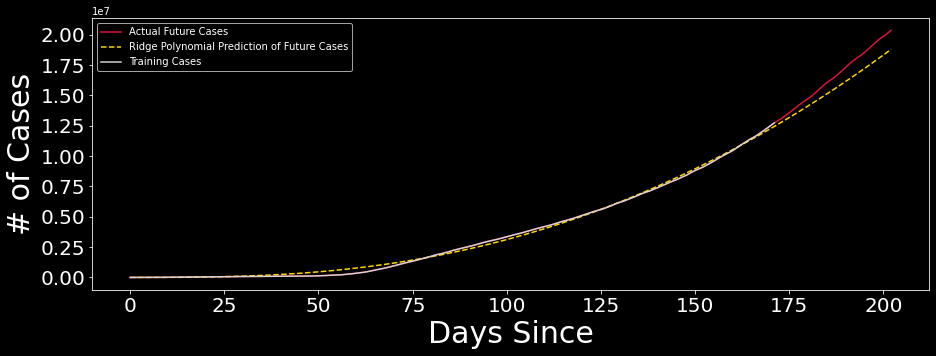

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Future Cases',
         color = 'crimson')
plt.plot(y,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Future Cases',
         linestyle = "dashed",
         color = 'gold')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
#plt.grid()
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**SVM**

In [ ]:
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10, 100];
gamma = [0.01, 0.1, 1];
epsilon = [0.01, 0.1, 1];
shrinking = [True, False];
svm_grid = {'kernel' :kernel,
           'C' : c,
           'gamma':gamma,
           'epsilon': epsilon,
           'shrinking': shrinking}
svm = SVR();

svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv=3,
                               return_train_score = True)


svm_search.fit(y_train, X_train) # note how y_train had to be put first
print(svm_search.best_params_)

{'shrinking': False, 'kernel': 'poly', 'gamma': 1, 'epsilon': 1, 'C': 0.1}


In [ ]:
y_pred_test = svm_search.predict(y_test)
# predict for the test days (future)

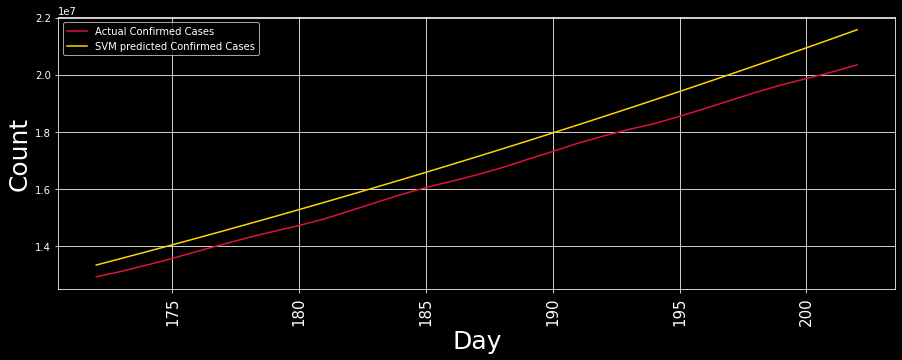

MAE: 682698.4687172794
MSE: 515236548457.3806
r2_score: 0.9147842375395554
RMSE: 717799.7969192946


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);

# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'crimson')

# plotting the predicited values for the future days
plt.plot(y_test,
         y_pred_test,
         label = "SVM predicted Confirmed Cases",
         color = 'gold')

plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(y_pred_test, X_test))
print('MSE:',mean_squared_error(y_pred_test, X_test))
print('r2_score:',r2_score(y_pred_test, X_test))
print('RMSE:', sqrt(mean_squared_error (y_pred_test, X_test)))

In [ ]:
y_pred = svm_search.predict(y)

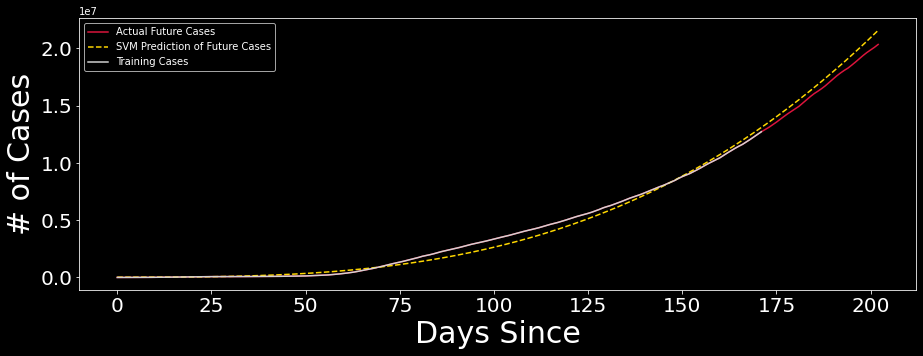

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Future Cases',
         color = 'crimson')

plt.plot(y,
         y_pred,
         label = 'SVM Prediction of Future Cases',
         linestyle = "dashed",
         color = 'gold')

plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

COMBINED GRAPH

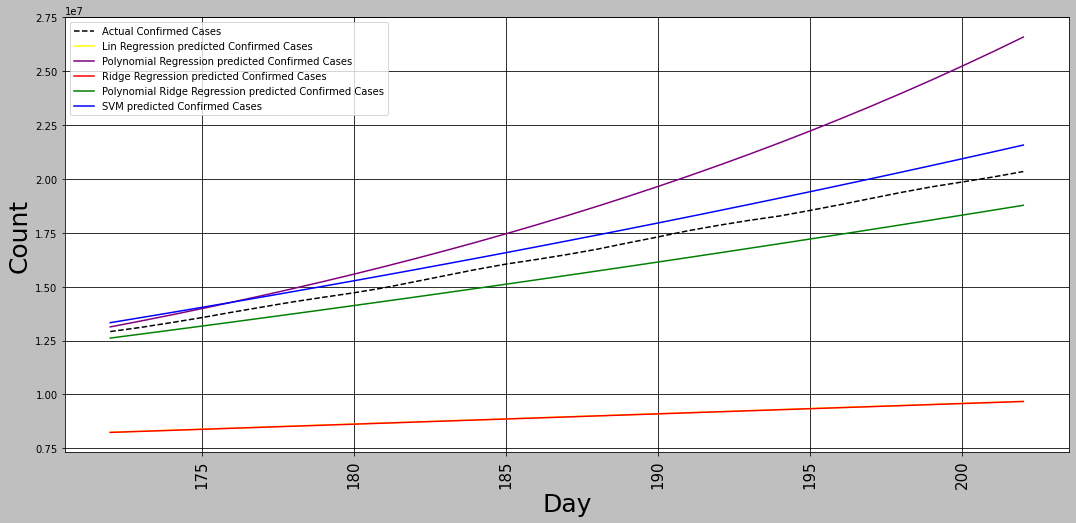

In [ ]:
plt.style.use("grayscale");
plt.figure(figsize = [18,8]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'black',
         linestyle = "dashed")
# plotting the predicited values for the future days
plt.plot(y_test,
         test_lin_pred,
         label = "Lin Regression predicted Confirmed Cases",
         color = 'yellow')
plt.plot(y_test,
         test_linear_pred,
         label = "Polynomial Regression predicted Confirmed Cases",
         color = 'purple')
plt.plot(y_test,
         y_test_ridge_pred,
         label = "Ridge Regression predicted Confirmed Cases",
         color = 'red')

plt.plot(y_test,
         test_poly_bayesian_pred,
         label = "Polynomial Ridge Regression predicted Confirmed Cases",
         color = 'green')
plt.plot(y_test,
         y_pred_test,
         label = "SVM predicted Confirmed Cases",
         color = 'blue')


plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

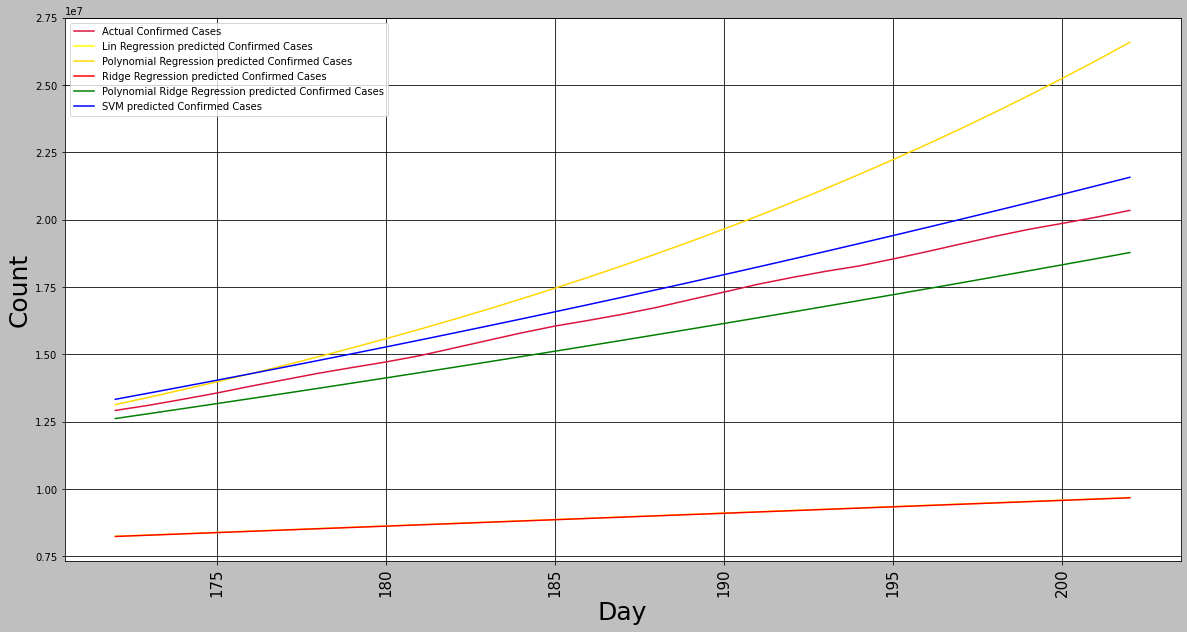

In [ ]:
plt.style.use("grayscale");
plt.figure(figsize = [20,10]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         test_lin_pred,
         label = "Lin Regression predicted Confirmed Cases",
         color = 'yellow')
plt.plot(y_test,
         test_linear_pred,
         label = "Polynomial Regression predicted Confirmed Cases",
         color = 'gold')
plt.plot(y_test,
         y_test_ridge_pred,
         label = "Ridge Regression predicted Confirmed Cases",
         color = 'red')

plt.plot(y_test,
         test_poly_bayesian_pred,
         label = "Polynomial Ridge Regression predicted Confirmed Cases",
         color = 'green')
plt.plot(y_test,
         y_pred_test,
         label = "SVM predicted Confirmed Cases",
         color = 'blue')


plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

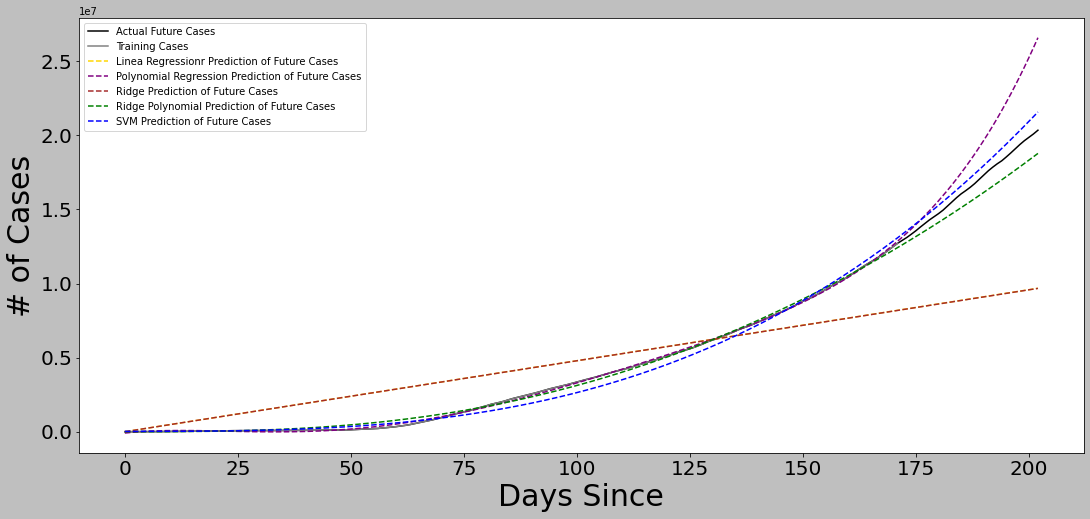

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(y,
         X,
         label = 'Actual Future Cases',
         color = 'black')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'grey')
plt.plot(y,
         lin_pred,
         label = 'Linea Regressionr Prediction of Future Cases',
         linestyle = "dashed",
         color = 'gold')
plt.plot(y,
         linear_pred,
         label = 'Polynomial Regression Prediction of Future Cases',
         linestyle = "dashed",
         color = 'purple')
plt.plot(y,
         y_ridge_pred,
         label = 'Ridge Prediction of Future Cases',
         linestyle = "dashed",
         color = 'brown')
plt.plot(y,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Future Cases',
         linestyle = "dashed",
         color = 'green')
plt.plot(y,
         y_pred,
         label = 'SVM Prediction of Future Cases',
         linestyle = "dashed",
         color = 'blue')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
#Lin Regression
print('MAE:', mean_absolute_error (test_lin_pred, X_test))
print('MSE:', mean_squared_error  (test_lin_pred, X_test))
print('r2_score:', r2_score  (test_lin_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_lin_pred, X_test)))
#polynomial regression
print('MAE:', mean_absolute_error(test_linear_pred, X_test))
print('MSE:',mean_squared_error(test_linear_pred, X_test))
print('r2_score:',r2_score(test_linear_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_linear_pred, X_test)))
#Ridge regression
print('MAE:', mean_absolute_error (y_test_ridge_pred, X_test))
print('MSE:', mean_squared_error  (y_test_ridge_pred, X_test))
print('r2_score:', r2_score  (y_test_ridge_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (y_test_ridge_pred, X_test)))
#Poly ridge
print ('MAE:', mean_absolute_error(test_poly_bayesian_pred, X_test))
print ('MSE:', mean_squared_error (test_poly_bayesian_pred, X_test))
print('r2_score:',r2_score(test_poly_bayesian_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_poly_bayesian_pred, X_test)))
#SVM
print('MAE:', mean_absolute_error(y_pred_test, X_test))
print('MSE:',mean_squared_error(y_pred_test, X_test))
print('r2_score:',r2_score(y_pred_test, X_test))
print('RMSE:', sqrt(mean_squared_error (y_pred_test, X_test)))



MAE: 7595848.668577207
MSE: 61016326511225.17
r2_score: -331.2300380259948
RMSE: 7811294.80375854
MAE: 2291116.820981283
MSE: 8392803916603.991
r2_score: 0.47312765381383337
RMSE: 2897033.640916859
MAE: 7603551.139418214
MSE: 61134741518252.13
r2_score: -332.44786155692174
RMSE: 7818870.85954565
MAE: 972119.3288768079
MSE: 1117008330235.877
r2_score: 0.6693704751032781
RMSE: 1056886.1481899917
MAE: 682698.4687172794
MSE: 515236548457.3806
r2_score: 0.9147842375395554
RMSE: 717799.7969192946


It seems that Polynomial Regression and Support Vector Regression were the best models in predicting the confirmed cases data.

In [ ]:
print("Polynomial Regression ")
print('\tMAE:', mean_absolute_error(test_linear_pred, X_test))
print('\tMSE:',mean_squared_error(test_linear_pred, X_test))

print("\nSupport Vector Regression ")
print ('\tMAE:', mean_absolute_error(y_pred_test, X_test))
print ('\tMSE:', mean_squared_error (y_pred_test, X_test))

Polynomial Regression 
	MAE: 2291116.820981283
	MSE: 8392803916603.991

Support Vector Regression 
	MAE: 682698.4687172794
	MSE: 515236548457.3806


Because it has the lower Mean Absolute Error and Mean Squared Error, Support Vector Regression Model seems to be the best model.

**PREDICTION OF RECOVERED CASES**

LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV;
from sklearn.preprocessing import StandardScaler;
X = np.array(df_date_tots["Recovered"])#.reshape(-1,1)
# X is the world cases array
y = np.array(df_date_tots["Days Since:"]).reshape(-1,1)
# y is the day count array associated with the world cases array

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15,shuffle = False)
# shuffle = False lets the data be split in order

In [ ]:
lin_model = LinearRegression(normalize = True, fit_intercept = False);
lin_model.fit(y_train, X_train);
test_lin_pred = lin_model.predict(y_test)
lin_pred = lin_model.predict(y)

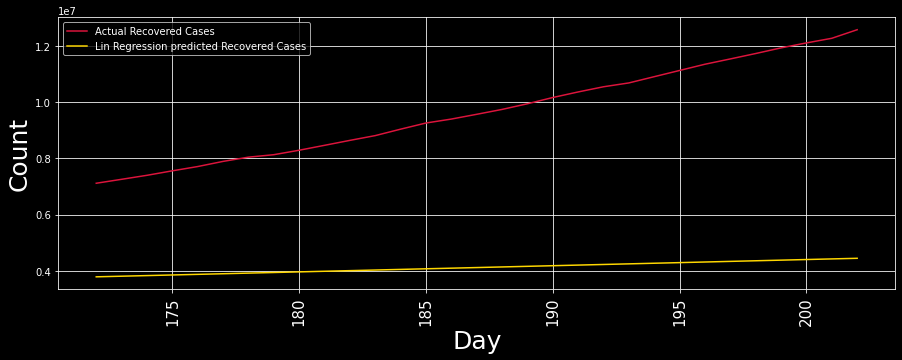

MAE: 5554802.846851923
MSE: 32932583683328.613
r2_score: -849.9125378639127
RMSE: 5738691.809404702


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the Recovered days
plt.plot(y_test,
         X_test,
         label = "Actual Recovered Cases",
         color = 'crimson')
# plotting the predicited values for the Recovered days
plt.plot(y_test,
         test_lin_pred,
         label = "Lin Regression predicted Recovered Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error (test_lin_pred, X_test))
print('MSE:', mean_squared_error  (test_lin_pred, X_test))
print('r2_score:', r2_score  (test_lin_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_lin_pred, X_test)))

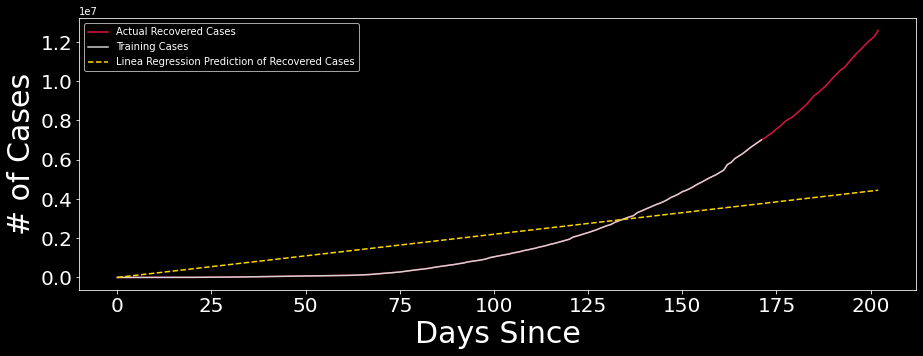

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Recovered Cases',
         color = 'crimson')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
plt.plot(y,
         lin_pred,
         label = 'Linea Regression Prediction of Recovered Cases',
         linestyle = "dashed",
         color = 'gold')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

POLYNOMIAL REGRESSION

In [ ]:
poly = PolynomialFeatures(degree=5)
poly_y_train = poly.fit_transform(y_train)
poly_y_test  = poly.fit_transform(y_test)
poly_y = poly.fit_transform(y)

In [ ]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_y_train, X_train)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

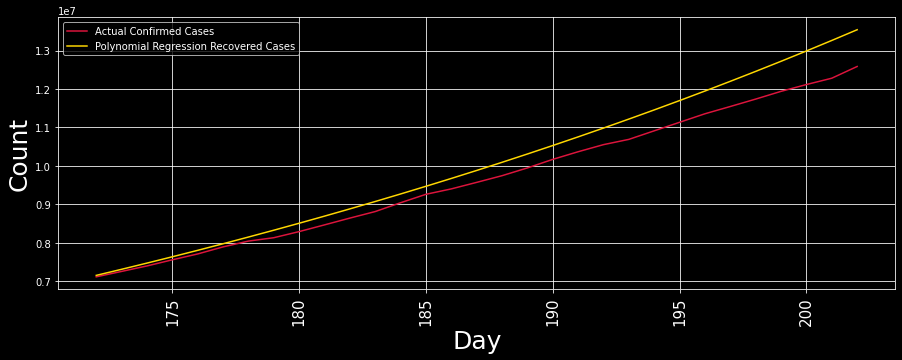

MAE: 379572.784842607
MSE: 216996842552.22528
r2_score: 0.9398860365121346
RMSE: 465829.198904733


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the Recovered days
plt.plot(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'crimson')
# plotting the predicited values for the Recovered days
plt.plot(y_test,
         test_linear_pred,
         label = "Polynomial Regression Recovered Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(test_linear_pred, X_test))
print('MSE:',mean_squared_error(test_linear_pred, X_test))
print('r2_score:',r2_score(test_linear_pred, X_test))
print('RMSE:',sqrt(mean_squared_error(test_linear_pred, X_test)))

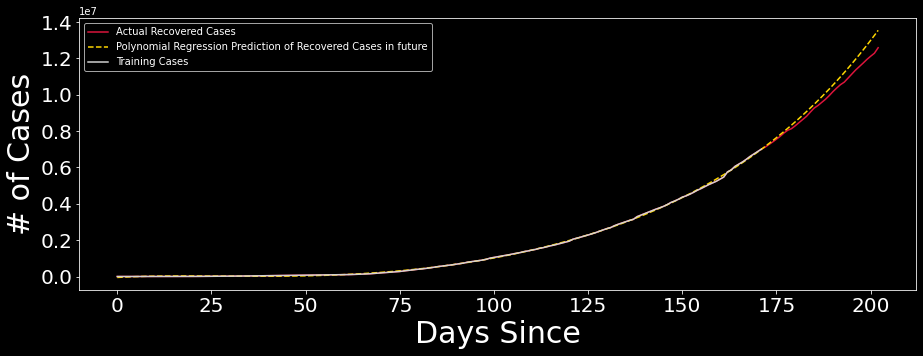

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Recovered Cases',
         color = 'crimson')

plt.plot(y,
         linear_pred,
         label = 'Polynomial Regression Prediction of Recovered Cases in future',
         linestyle = "dashed",
         color = 'gold')

plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

RIDGE REGRESSION

In [ ]:
tol      = [1e-4, 1e-3, 1e-2]
alpha_1  = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2  = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2' : alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2' : lambda_2 }

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

bayesian_search.fit(y_train, X_train);

print(bayesian_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'tol': 0.01, 'lambda_2': 0.0001, 'lambda_1': 0.0001, 'alpha_2': 1e-07, 'alpha_1': 0.0001}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.2s finished


In [ ]:
y_test_ridge_pred = bayesian_search.predict(y_test);
y_ridge_pred = bayesian_search.predict(y);

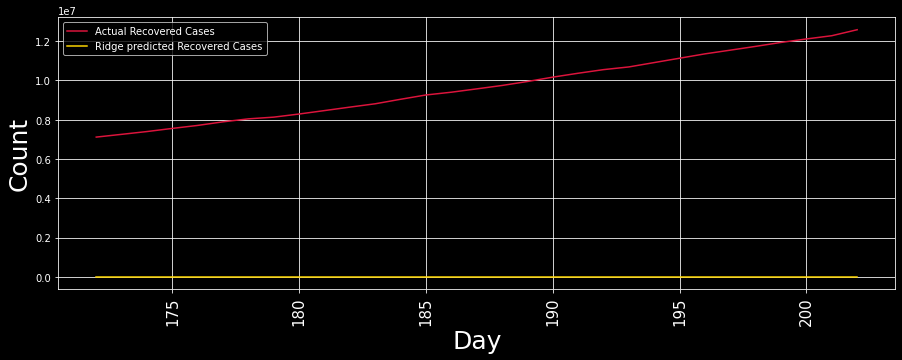

MAE: 9667880.260883592
MSE: 96149311603601.38
r2_score: -1.6212211339406384e+16
RMSE: 9805575.536581285


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Recovered Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         y_test_ridge_pred,
         label = "Ridge predicted Recovered Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error (y_test_ridge_pred, X_test))
print('MSE:', mean_squared_error  (y_test_ridge_pred, X_test))
print('r2_score:', r2_score  (y_test_ridge_pred, X_test))
print('RMSE:', sqrt(mean_squared_error  (y_test_ridge_pred, X_test)))

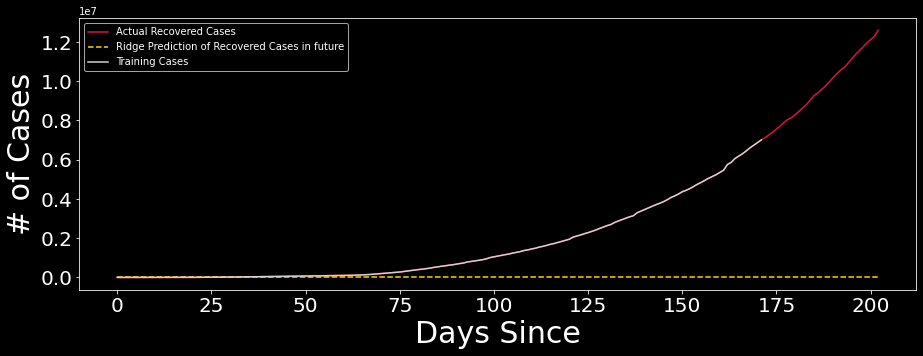

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Recovered Cases',
         color = 'crimson')
plt.plot(y,
         y_ridge_pred,
         label = 'Ridge Prediction of Recovered Cases in future',
         linestyle = "dashed",
         color = 'gold')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

RIDGE POLYNOMIAL REGRESSION

In [ ]:
bayesian_search_poly = RandomizedSearchCV(bayesian,bayesian_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)

In [ ]:
bayesian_search_poly.fit(poly_y_train, X_train);
print(bayesian_search_poly.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'tol': 0.01, 'lambda_2': 1e-06, 'lambda_1': 0.0001, 'alpha_2': 1e-07, 'alpha_1': 1e-07}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.5s finished


In [ ]:
bayesian_poly_recovered = bayesian_search_poly.best_estimator_
test_poly_bayesian_pred = bayesian_poly_recovered.predict(poly_y_test)
bayesian_poly_pred = bayesian_poly_recovered.predict(poly_y)

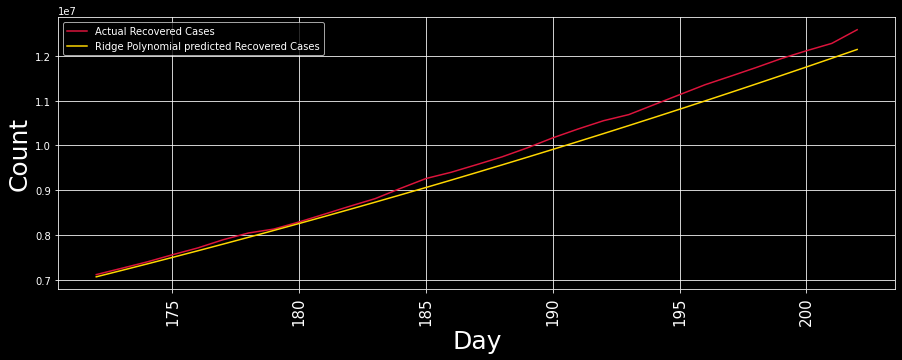

MAE: 196772.45405628497
MSE: 54836597115.31882
r2_score: 0.976110236502617
RMSE: 234172.15273238366


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the recovered days
plt.plot(y_test,
         X_test,
         label = "Actual Recovered Cases",
         color = 'crimson')
# plotting the predicited values for the recovered days
plt.plot(y_test,
         test_poly_bayesian_pred,
         label = "Ridge Polynomial predicted Recovered Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print ('MAE:', mean_absolute_error(test_poly_bayesian_pred, X_test))
print ('MSE:', mean_squared_error (test_poly_bayesian_pred, X_test))
print('r2_score:',r2_score(test_poly_bayesian_pred, X_test))
print ('RMSE:', sqrt(mean_squared_error (test_poly_bayesian_pred, X_test)))

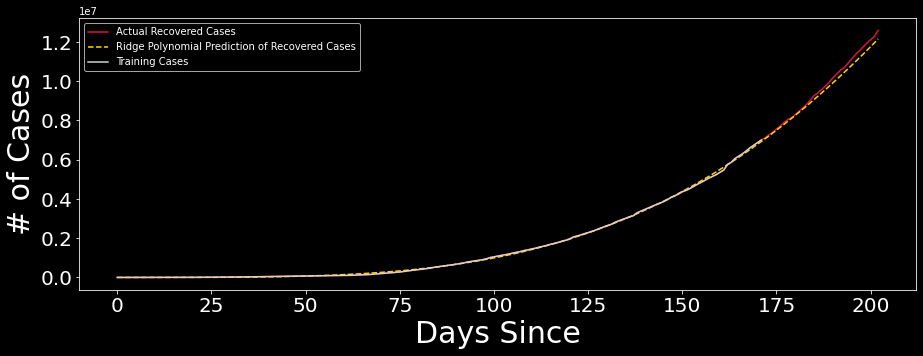

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Recovered Cases',
         color = 'crimson')
plt.plot(y,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Recovered Cases',
         linestyle = "dashed",
         color = 'gold')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
#plt.grid()
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

SVM

In [ ]:
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10, 100];
gamma = [0.01, 0.1, 1];
epsilon = [0.01, 0.1, 1];
shrinking = [True, False];
svm_grid = {'kernel' :kernel,
           'C' : c,
           'gamma':gamma,
           'epsilon': epsilon,
           'shrinking': shrinking}
svm = SVR();

svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv=3,
                               return_train_score = True)


svm_search.fit(y_train, X_train) # note how y_train had to be put first
print(svm_search.best_params_)

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 1, 'C': 0.01}


In [ ]:
y_pred_test = svm_search.predict(y_test)

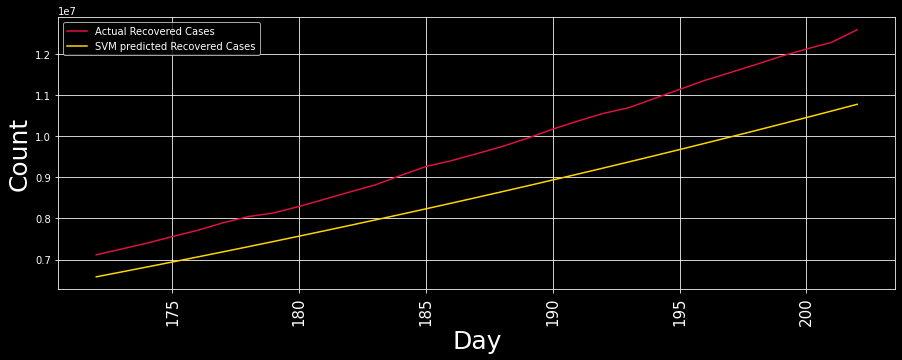

MAE: 1098349.4283494272
MSE: 1357552767708.8337
r2_score: 0.13109115515327374
RMSE: 1165140.6643443673


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);

# plotting the actual values for the recovered days
plt.plot(y_test,
         X_test,
         label = "Actual Recovered Cases",
         color = 'crimson')

# plotting the predicited values for the recovered days
plt.plot(y_test,
         y_pred_test,
         label = "SVM predicted Recovered Cases",
         color = 'gold')

plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(y_pred_test, X_test))
print('MSE:',mean_squared_error(y_pred_test, X_test))
print('r2_score:',r2_score(y_pred_test, X_test))
print('RMSE:',sqrt(mean_squared_error(y_pred_test, X_test)))

In [ ]:
y_pred = svm_search.predict(y)

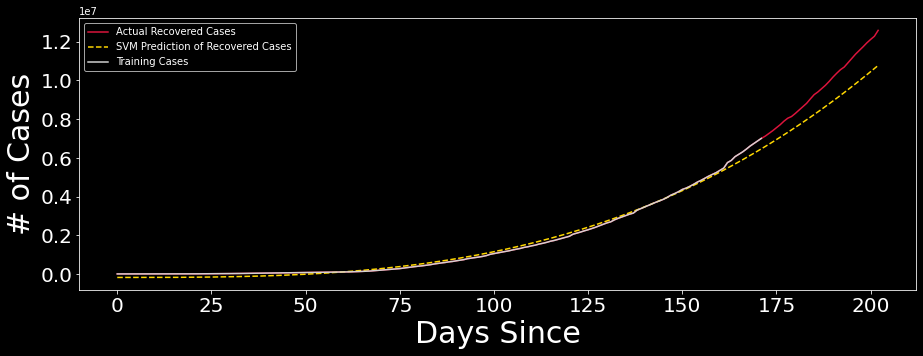

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Recovered Cases',
         color = 'crimson')

plt.plot(y,
         y_pred,
         label = 'SVM Prediction of Recovered Cases',
         linestyle = "dashed",
         color = 'gold')

plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

COMBINED PREDICTION

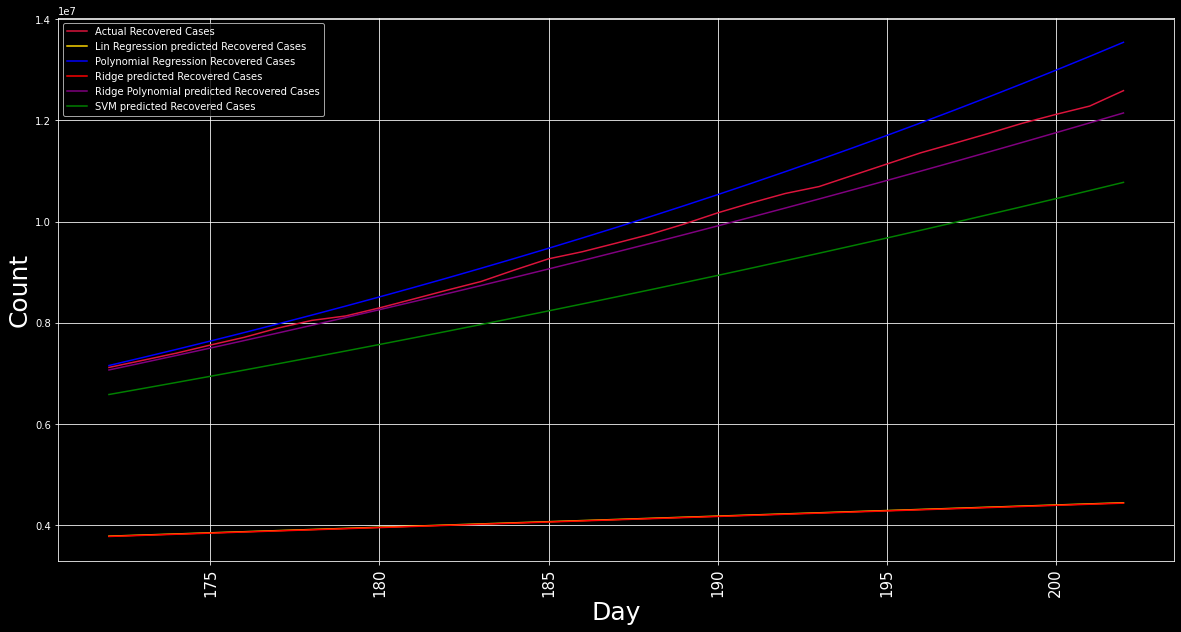

In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [20,10]);
# plotting the actual values for the Recovered days
plt.plot(y_test,
         X_test,
         label = "Actual Recovered Cases",
         color = 'crimson')
# plotting the predicited values for the Recovered days
plt.plot(y_test,
         test_lin_pred,
         label = "Lin Regression predicted Recovered Cases",
         color = 'gold')
plt.plot(y_test,
         test_linear_pred,
         label = "Polynomial Regression Recovered Cases",
         color = 'blue')
plt.plot(y_test,
         y_test_ridge_pred,
         label = "Ridge predicted Recovered Cases",
         color = 'red')
plt.plot(y_test,
         test_poly_bayesian_pred,
         label = "Ridge Polynomial predicted Recovered Cases",
         color = 'purple')
plt.plot(y_test,
         y_pred_test,
         label = "SVM predicted Recovered Cases",
         color = 'green')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

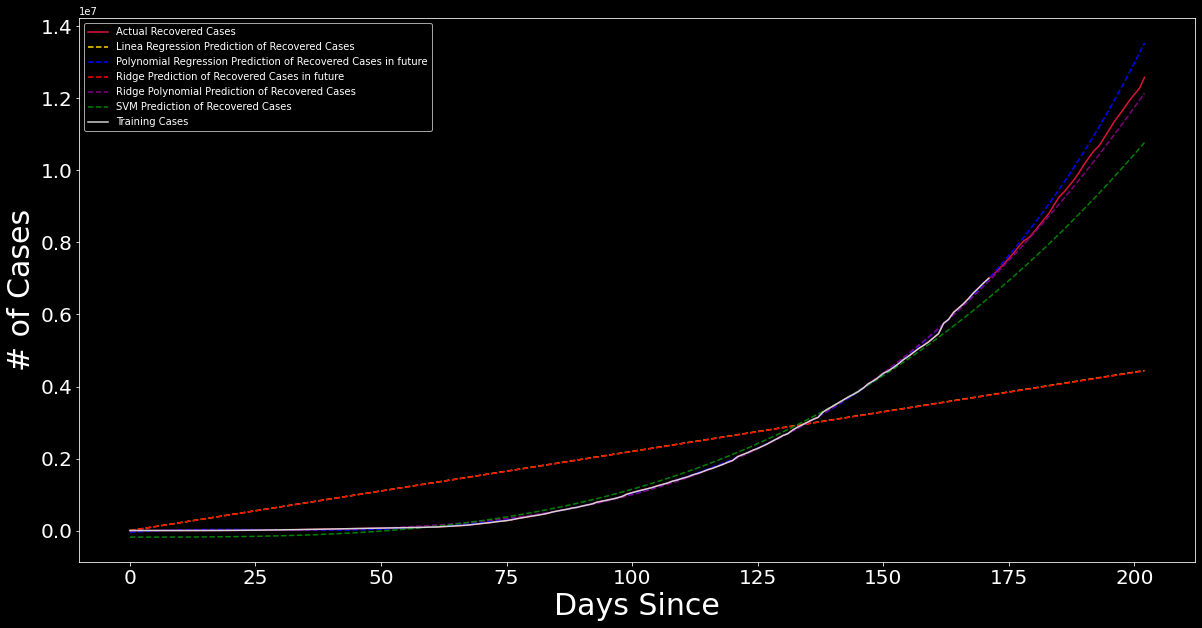

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(y,
         X,
         label = 'Actual Recovered Cases',
         color = 'crimson')
plt.plot(y,
         lin_pred,
         label = 'Linea Regression Prediction of Recovered Cases',
         linestyle = "dashed",
         color = 'gold')
plt.plot(y,
         linear_pred,
         label = 'Polynomial Regression Prediction of Recovered Cases in future',
         linestyle = "dashed",
         color = 'blue')
plt.plot(y,
         y_ridge_pred,
         label = 'Ridge Prediction of Recovered Cases in future',
         linestyle = "dashed",
         color = 'red')
plt.plot(y,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Recovered Cases',
         linestyle = "dashed",
         color = 'purple')
plt.plot(y,
         y_pred,
         label = 'SVM Prediction of Recovered Cases',
         linestyle = "dashed",
         color = 'green')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
#plt.grid()
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


**DEATH CASES**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV;
from sklearn.preprocessing import StandardScaler;
X = np.array(df_date_tots["Deaths"])#.reshape(-1,1)
# X is the world cases array
y = np.array(df_date_tots["Days Since:"]).reshape(-1,1)
# y is the day count array associated with the world cases array

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15,shuffle = False)
# shuffle = False lets the data be split in order

In [ ]:
lin_model = LinearRegression(normalize = True, fit_intercept = False);
lin_model.fit(y_train, X_train);
test_lin_pred = lin_model.predict(y_test)
lin_pred = lin_model.predict(y)

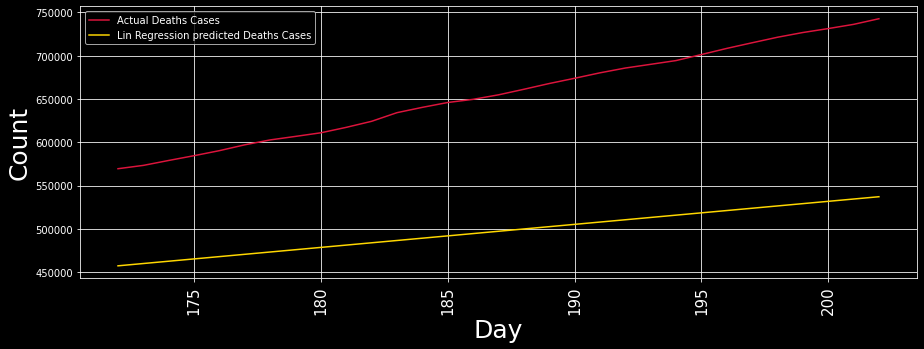

MAE: 158122.25295271954
MSE: 25829056460.646404
r2_score: -44.6535594800854
RMSE: 160714.20740135704


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the Deaths days
plt.plot(y_test,
         X_test,
         label = "Actual Deaths Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         test_lin_pred,
         label = "Lin Regression predicted Deaths Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error (test_lin_pred, X_test))
print('MSE:', mean_squared_error  (test_lin_pred, X_test))
print('r2_score:', r2_score  (test_lin_pred, X_test))
print('RMSE:', sqrt(mean_squared_error  (test_lin_pred, X_test)))

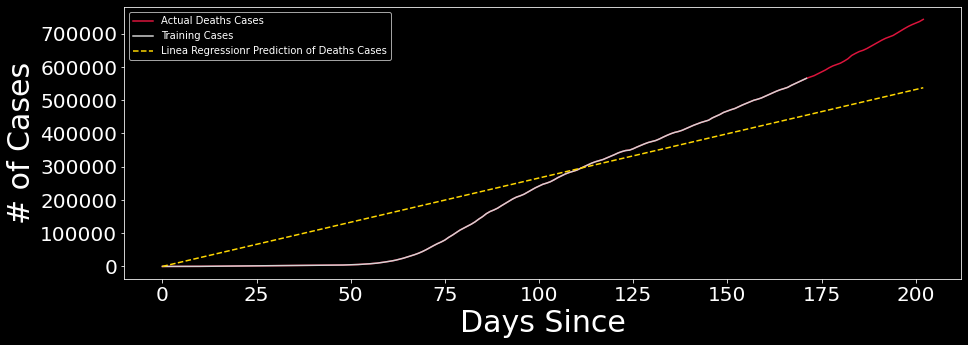

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Deaths Cases',
         color = 'crimson')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
plt.plot(y,
         lin_pred,
         label = 'Linea Regressionr Prediction of Deaths Cases',
         linestyle = "dashed",
         color = 'gold')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

POLYNOMIAL REGRESSION

In [ ]:
poly = PolynomialFeatures(degree=5)
poly_y_train = poly.fit_transform(y_train)
poly_y_test  = poly.fit_transform(y_test)
poly_y = poly.fit_transform(y)

In [ ]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_y_train, X_train)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

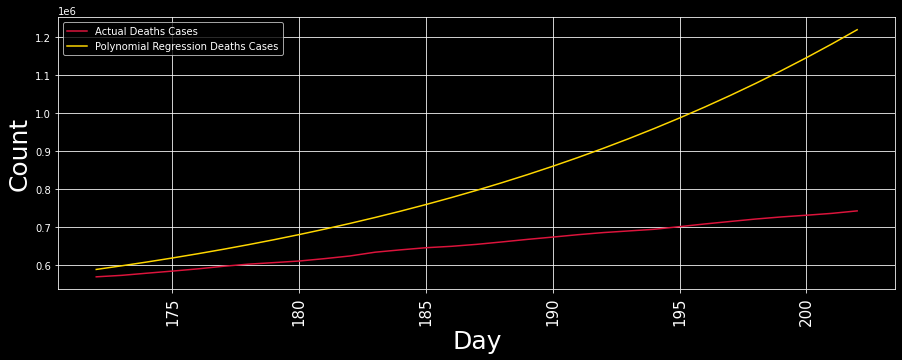

MAE: 179182.45242465535
MSE: 50368957781.42736
r2_score: -0.45008795621912
RMSE: 224430.2960418387


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Deaths Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         test_linear_pred,
         label = "Polynomial Regression Deaths Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(test_linear_pred, X_test))
print('MSE:',mean_squared_error(test_linear_pred, X_test))
print('r2_score:',r2_score(test_linear_pred, X_test))
print('RMSE:',sqrt(mean_squared_error(test_linear_pred, X_test)))

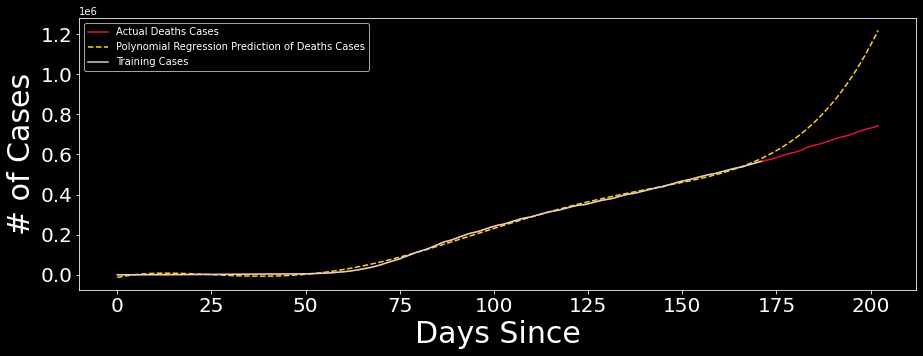

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Deaths Cases',
         color = 'crimson')

plt.plot(y,
         linear_pred,
         label = 'Polynomial Regression Prediction of Deaths Cases',
         linestyle = "dashed",
         color = 'gold')

plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

RIDGE REGRESSION

In [ ]:
tol      = [1e-4, 1e-3, 1e-2]
alpha_1  = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2  = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2' : alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2' : lambda_2 }

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

bayesian_search.fit(y_train, X_train);

print(bayesian_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'tol': 0.001, 'lambda_2': 1e-05, 'lambda_1': 1e-07, 'alpha_2': 1e-07, 'alpha_1': 0.0001}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.4s finished


In [ ]:
y_test_ridge_pred = bayesian_search.predict(y_test);
y_ridge_pred = bayesian_search.predict(y);

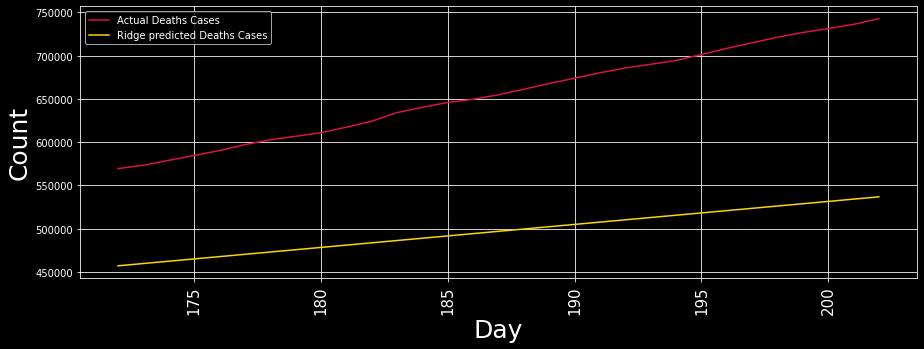

MAE: 158395.88888515165
MSE: 25916418921.005417
r2_score: -44.85842826274354
RMSE: 160985.77241795443


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Deaths Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         y_test_ridge_pred,
         label = "Ridge predicted Deaths Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error (y_test_ridge_pred, X_test))
print('MSE:', mean_squared_error  (y_test_ridge_pred, X_test))
print('r2_score:', r2_score  (y_test_ridge_pred, X_test))
print('RMSE:', sqrt(mean_squared_error  (y_test_ridge_pred, X_test)))

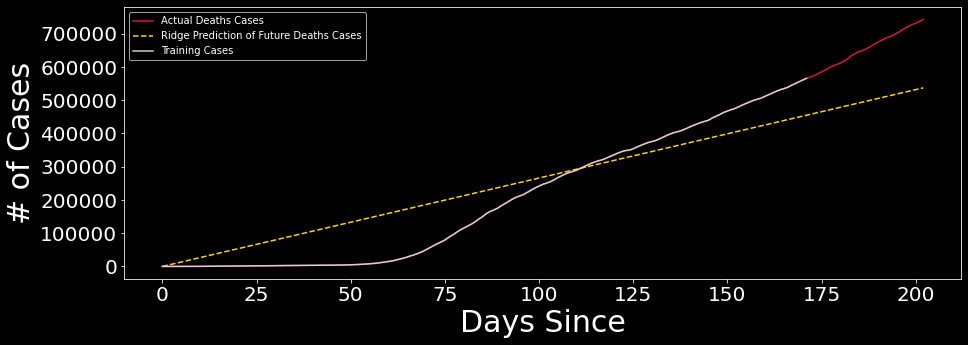

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Deaths Cases',
         color = 'crimson')
plt.plot(y,
         y_ridge_pred,
         label = 'Ridge Prediction of Future Deaths Cases',
         linestyle = "dashed",
         color = 'gold')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

POLYNOMIAL RIDGE REGRESSION

In [ ]:
bayesian_search_poly = RandomizedSearchCV(bayesian,bayesian_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)

In [ ]:
bayesian_search_poly.fit(poly_y_train, X_train);
print(bayesian_search_poly.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'tol': 0.01, 'lambda_2': 1e-06, 'lambda_1': 0.0001, 'alpha_2': 1e-06, 'alpha_1': 1e-07}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished


In [ ]:
bayesian_poly_deaths = bayesian_search_poly.best_estimator_
test_poly_bayesian_pred = bayesian_poly_deaths.predict(poly_y_test)
bayesian_poly_pred = bayesian_poly_deaths.predict(poly_y)

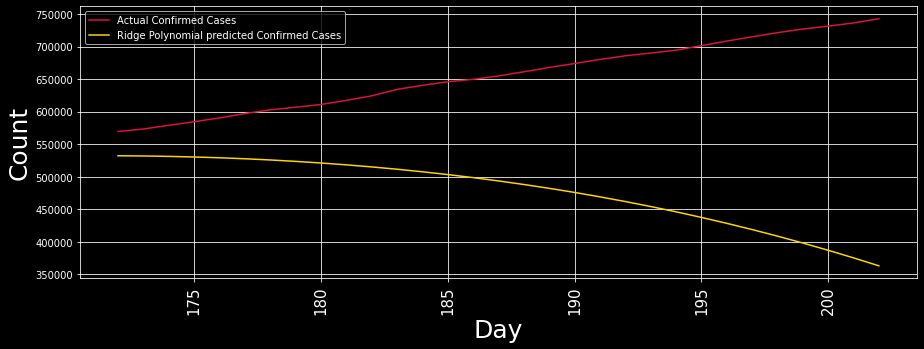

MAE: 178009.0375180673
MSE: 42247050496.21255
r2_score: -15.026743513598447
RMSE: 205540.87305500224


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         test_poly_bayesian_pred,
         label = "Ridge Polynomial predicted Confirmed Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print ('MAE:', mean_absolute_error(test_poly_bayesian_pred, X_test))
print ('MSE:', mean_squared_error (test_poly_bayesian_pred, X_test))
print('r2_score:',r2_score(test_poly_bayesian_pred, X_test))
print ('RMSE:', sqrt(mean_squared_error (test_poly_bayesian_pred, X_test)))

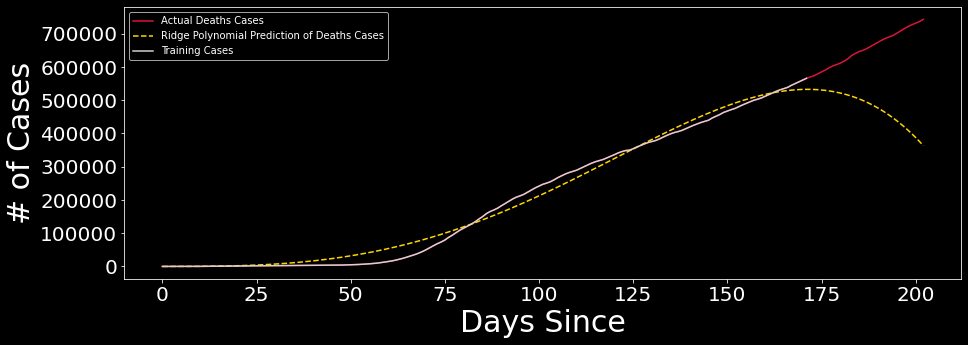

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Deaths Cases',
         color = 'crimson')
plt.plot(y,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Deaths Cases',
         linestyle = "dashed",
         color = 'gold')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
#plt.grid()
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10, 100];
gamma = [0.01, 0.1, 1];
epsilon = [0.01, 0.1, 1];
shrinking = [True, False];
svm_grid = {'kernel' :kernel,
           'C' : c,
           'gamma':gamma,
           'epsilon': epsilon,
           'shrinking': shrinking}
svm = SVR();

svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv=3,
                               return_train_score = True)


svm_search.fit(y_train, X_train) # note how y_train had to be put first
print(svm_search.best_params_)

In [ ]:
y_pred_test = svm_search.predict(y_test)
# predict for the test days (future)

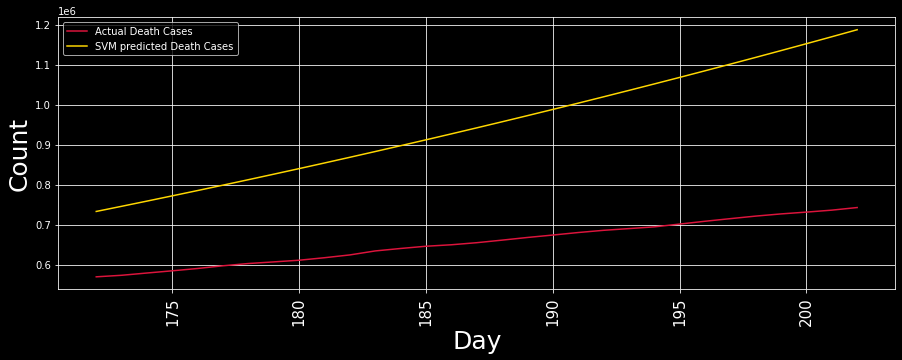

MAE: 292932.3319621907
MSE: 92705806329.11493
r2_score: -4.053258138336647
RMSE: 304476.28204691893


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);

# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Death Cases",
         color = 'crimson')

# plotting the predicited values for the future days
plt.plot(y_test,
         y_pred_test,
         label = "SVM predicted Death Cases",
         color = 'gold')

plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(y_pred_test, X_test))
print('MSE:',mean_squared_error(y_pred_test, X_test))
print('r2_score:',r2_score(y_pred_test, X_test))
print('RMSE:', sqrt(mean_squared_error (y_pred_test, X_test)))

In [ ]:
y_pred = svm_search.predict(y)

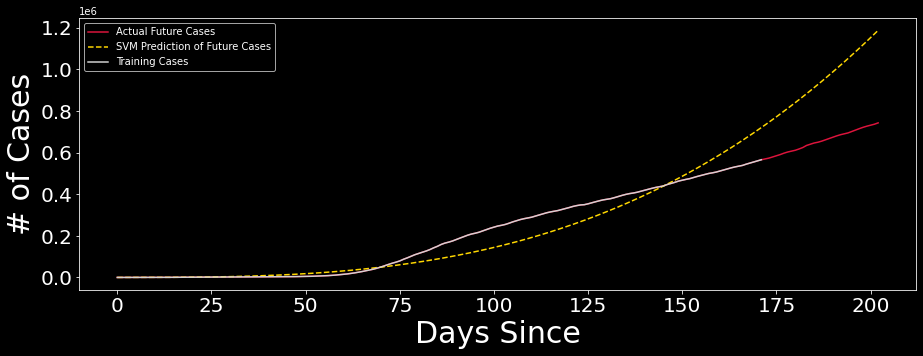

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Future Cases',
         color = 'crimson')

plt.plot(y,
         y_pred,
         label = 'SVM Prediction of Future Cases',
         linestyle = "dashed",
         color = 'gold')

plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

COMBINED PREDICTION OF DEATH CASES

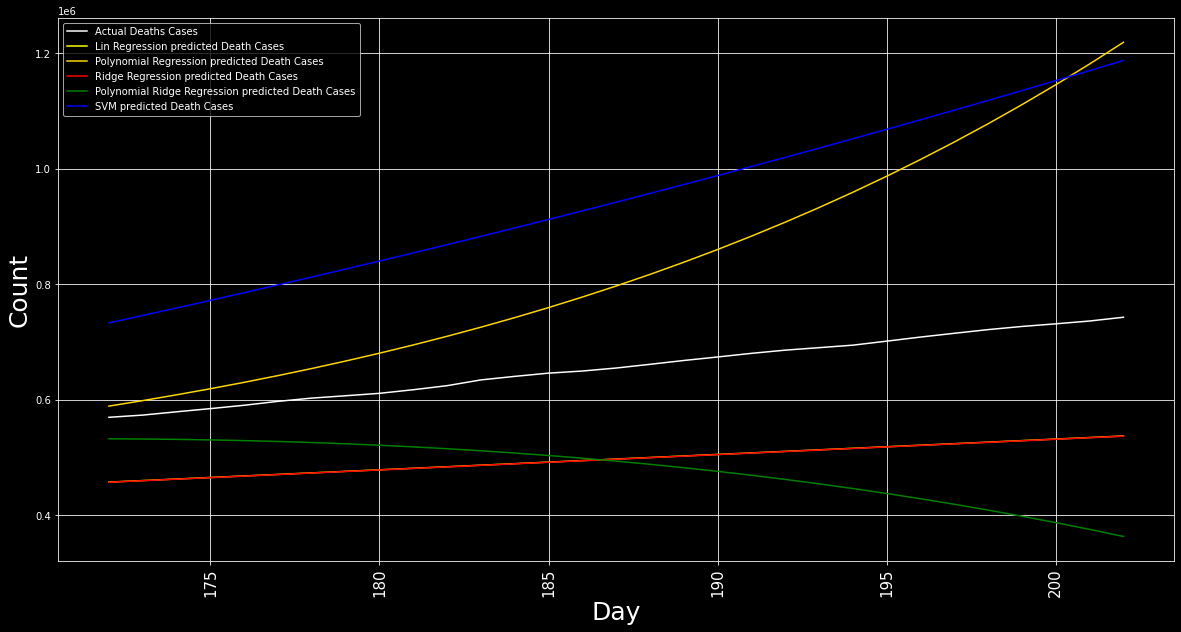

In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [20,10]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Deaths Cases",
         color = 'white'
         )
# plotting the predicited values for the future days
plt.plot(y_test,
         test_lin_pred,
         label = "Lin Regression predicted Death Cases",
         color = 'yellow')
plt.plot(y_test,
         test_linear_pred,
         label = "Polynomial Regression predicted Death Cases",
         color = 'gold')
plt.plot(y_test,
         y_test_ridge_pred,
         label = "Ridge Regression predicted Death Cases",
         color = 'red')

plt.plot(y_test,
         test_poly_bayesian_pred,
         label = "Polynomial Ridge Regression predicted Death Cases",
         color = 'green')
plt.plot(y_test,
         y_pred_test,
         label = "SVM predicted Death Cases",
         color = 'blue')


plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

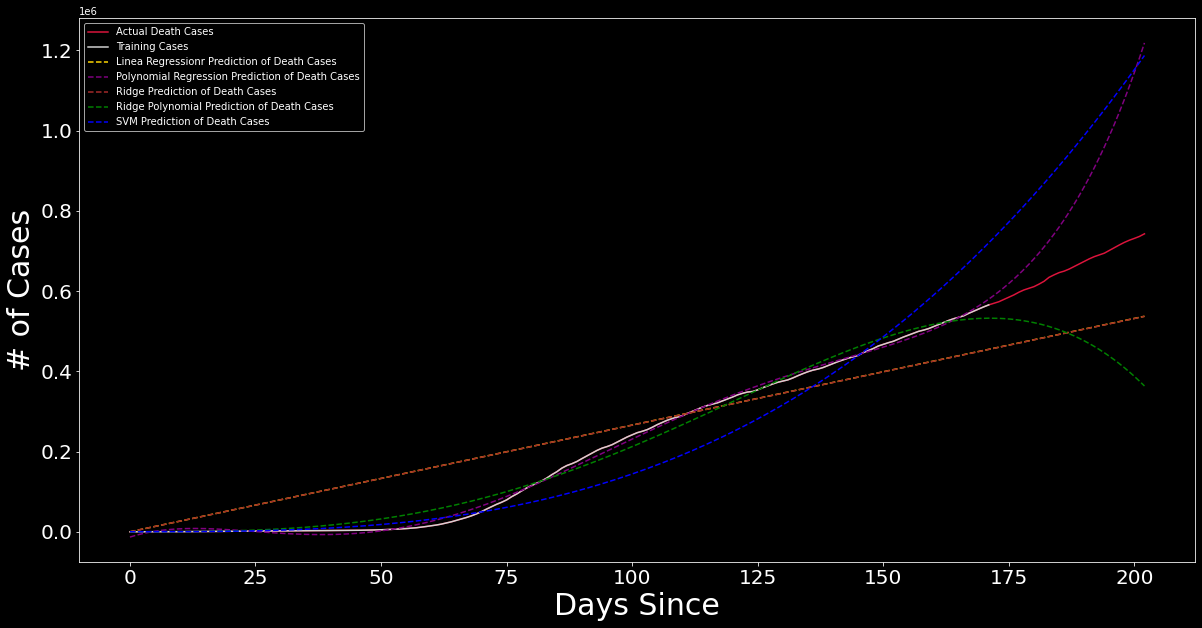

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(y,
         X,
         label = 'Actual Death Cases',
         color = 'crimson')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
plt.plot(y,
         lin_pred,
         label = 'Linea Regressionr Prediction of Death Cases',
         linestyle = "dashed",
         color = 'gold')
plt.plot(y,
         linear_pred,
         label = 'Polynomial Regression Prediction of Death Cases',
         linestyle = "dashed",
         color = 'purple')
plt.plot(y,
         y_ridge_pred,
         label = 'Ridge Prediction of Death Cases',
         linestyle = "dashed",
         color = 'brown')
plt.plot(y,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Death Cases',
         linestyle = "dashed",
         color = 'green')
plt.plot(y,
         y_pred,
         label = 'SVM Prediction of Death Cases',
         linestyle = "dashed",
         color = 'blue')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
#Lin Regression
print('MAE:', mean_absolute_error (test_lin_pred, X_test))
print('MSE:', mean_squared_error  (test_lin_pred, X_test))
print('r2_score:', r2_score  (test_lin_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_lin_pred, X_test)))
#polynomial regression
print('MAE:', mean_absolute_error(test_linear_pred, X_test))
print('MSE:',mean_squared_error(test_linear_pred, X_test))
print('r2_score:',r2_score(test_linear_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_linear_pred, X_test)))
#Ridge regression
print('MAE:', mean_absolute_error (y_test_ridge_pred, X_test))
print('MSE:', mean_squared_error  (y_test_ridge_pred, X_test))
print('r2_score:', r2_score  (y_test_ridge_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (y_test_ridge_pred, X_test)))
#Poly ridge
print ('MAE:', mean_absolute_error(test_poly_bayesian_pred, X_test))
print ('MSE:', mean_squared_error (test_poly_bayesian_pred, X_test))
print('r2_score:',r2_score(test_poly_bayesian_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_poly_bayesian_pred, X_test)))
#SVM
print('MAE:', mean_absolute_error(y_pred_test, X_test))
print('MSE:',mean_squared_error(y_pred_test, X_test))
print('r2_score:',r2_score(y_pred_test, X_test))
print('RMSE:', sqrt(mean_squared_error (y_pred_test, X_test)))



MAE: 158122.25295271954
MSE: 25829056460.646404
r2_score: -44.6535594800854
RMSE: 160714.20740135704
MAE: 179182.45242465535
MSE: 50368957781.42736
r2_score: -0.45008795621912
RMSE: 224430.2960418387
MAE: 158395.88888515244
MSE: 25916418921.005657
r2_score: -44.85842826274409
RMSE: 160985.7724179552
MAE: 178009.1827623882
MSE: 42247119546.67494
r2_score: -15.026717369411937
RMSE: 205541.04102751584
MAE: 292932.3319621907
MSE: 92705806329.11493
r2_score: -4.053258138336647
RMSE: 304476.28204691893


**COMPLETED NO MORE CHANGES NOW** Death cases

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV;
from sklearn.preprocessing import StandardScaler;
X = np.array(df_date_tots["Deaths"])#.reshape(-1,1)
# X is the world cases array
y = np.array(df_date_tots["Days Since:"]).reshape(-1,1)
# y is the day count array associated with the world cases array

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15,shuffle = False)
# shuffle = False lets the data be split in order

In [ ]:
lin_model = LinearRegression(normalize = True, fit_intercept = False);
lin_model.fit(y_train, X_train);
test_lin_pred = lin_model.predict(y_test)
lin_pred = lin_model.predict(y)

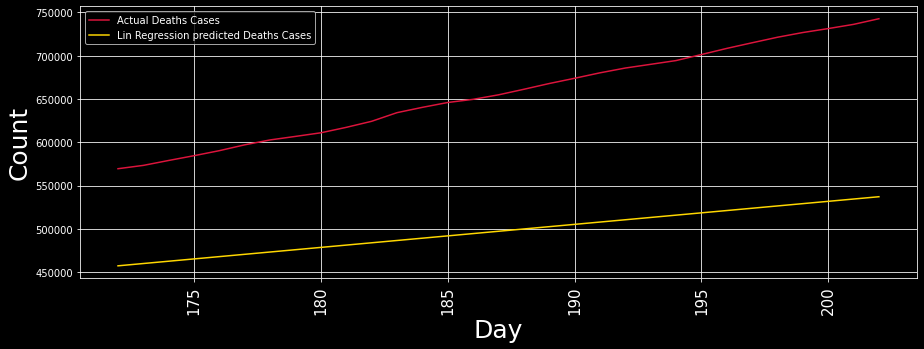

MAE: 158122.25295271954
MSE: 25829056460.646404
r2_score: -44.6535594800854
RMSE: 160714.20740135704


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the Deaths days
plt.plot(y_test,
         X_test,
         label = "Actual Deaths Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         test_lin_pred,
         label = "Lin Regression predicted Deaths Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error (test_lin_pred, X_test))
print('MSE:', mean_squared_error  (test_lin_pred, X_test))
print('r2_score:', r2_score  (test_lin_pred, X_test))
print('RMSE:', sqrt(mean_squared_error  (test_lin_pred, X_test)))

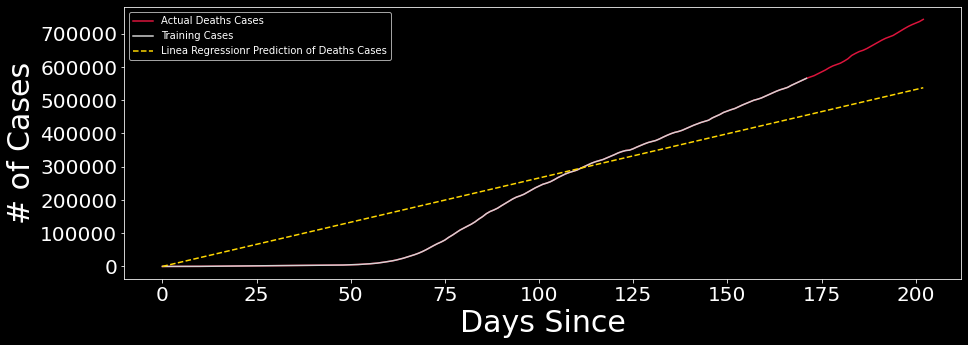

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Deaths Cases',
         color = 'crimson')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
plt.plot(y,
         lin_pred,
         label = 'Linea Regressionr Prediction of Deaths Cases',
         linestyle = "dashed",
         color = 'gold')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=5)
poly_y_train = poly.fit_transform(y_train)
poly_y_test  = poly.fit_transform(y_test)
poly_y = poly.fit_transform(y)

In [ ]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_y_train, X_train)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

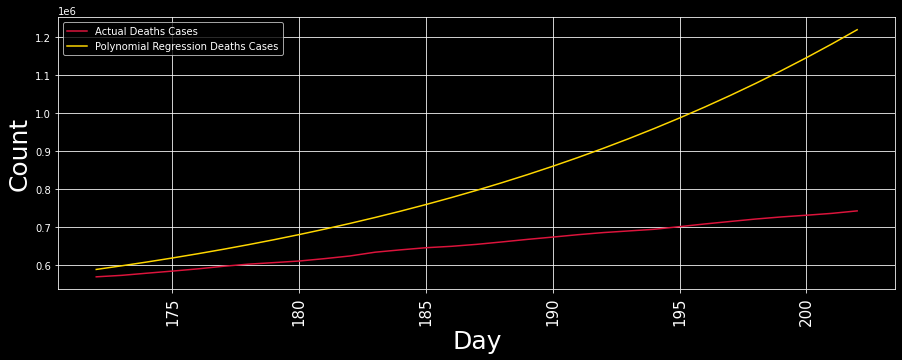

MAE: 179182.45242465535
MSE: 50368957781.42736
r2_score: -0.45008795621912
RMSE: 224430.2960418387


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Deaths Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         test_linear_pred,
         label = "Polynomial Regression Deaths Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(test_linear_pred, X_test))
print('MSE:',mean_squared_error(test_linear_pred, X_test))
print('r2_score:',r2_score(test_linear_pred, X_test))
print('RMSE:',sqrt(mean_squared_error(test_linear_pred, X_test)))

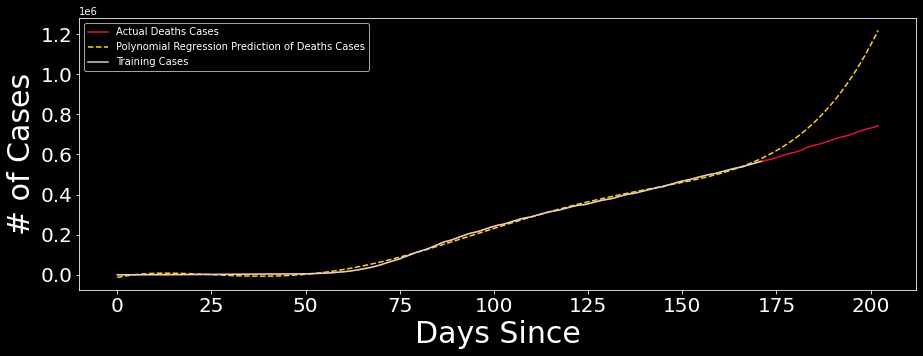

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Deaths Cases',
         color = 'crimson')

plt.plot(y,
         linear_pred,
         label = 'Polynomial Regression Prediction of Deaths Cases',
         linestyle = "dashed",
         color = 'gold')

plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
tol      = [1e-4, 1e-3, 1e-2]
alpha_1  = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2  = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2' : alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2' : lambda_2 }

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

bayesian_search.fit(y_train, X_train);

print(bayesian_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'tol': 0.001, 'lambda_2': 1e-07, 'lambda_1': 1e-07, 'alpha_2': 1e-05, 'alpha_1': 0.0001}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.3s finished


In [ ]:
y_test_ridge_pred = bayesian_search.predict(y_test);
y_ridge_pred = bayesian_search.predict(y);

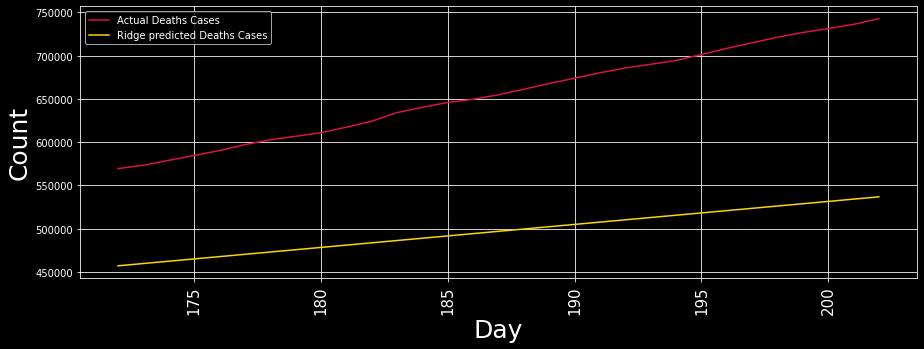

MAE: 158395.88888515244
MSE: 25916418921.005657
r2_score: -44.85842826274409
RMSE: 160985.7724179552


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Deaths Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         y_test_ridge_pred,
         label = "Ridge predicted Deaths Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error (y_test_ridge_pred, X_test))
print('MSE:', mean_squared_error  (y_test_ridge_pred, X_test))
print('r2_score:', r2_score  (y_test_ridge_pred, X_test))
print('RMSE:', sqrt(mean_squared_error  (y_test_ridge_pred, X_test)))

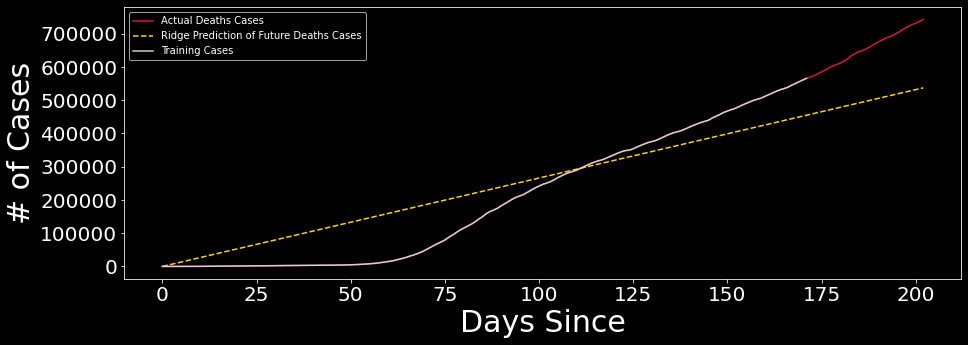

In [ ]:
vplt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Deaths Cases',
         color = 'crimson')
plt.plot(y,
         y_ridge_pred,
         label = 'Ridge Prediction of Future Deaths Cases',
         linestyle = "dashed",
         color = 'gold')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
bayesian_search_poly = RandomizedSearchCV(bayesian,bayesian_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)

In [ ]:
bayesian_search_poly.fit(poly_y_train, X_train);
print(bayesian_search_poly.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'tol': 0.01, 'lambda_2': 1e-07, 'lambda_1': 0.0001, 'alpha_2': 0.0001, 'alpha_1': 0.0001}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished


In [ ]:
bayesian_poly_deaths = bayesian_search_poly.best_estimator_
test_poly_bayesian_pred = bayesian_poly_deaths.predict(poly_y_test)
bayesian_poly_pred = bayesian_poly_deaths.predict(poly_y)

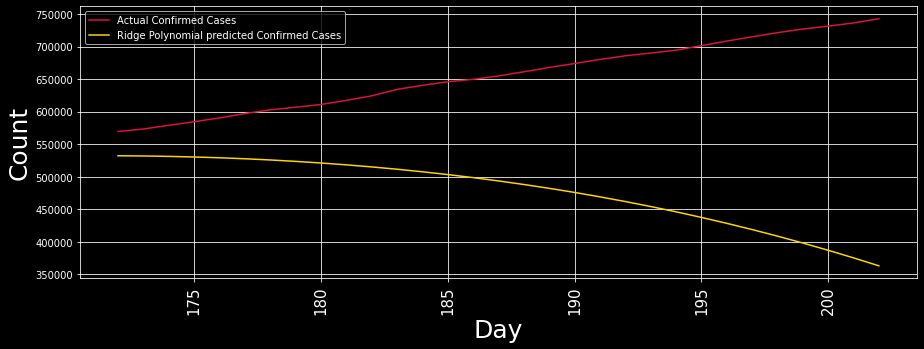

MAE: 178009.1754650604
MSE: 42247116077.51375
r2_score: -15.02671868279036
RMSE: 205541.03258841956


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'crimson')
# plotting the predicited values for the future days
plt.plot(y_test,
         test_poly_bayesian_pred,
         label = "Ridge Polynomial predicted Confirmed Cases",
         color = 'gold')
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print ('MAE:', mean_absolute_error(test_poly_bayesian_pred, X_test))
print ('MSE:', mean_squared_error (test_poly_bayesian_pred, X_test))
print('r2_score:',r2_score(test_poly_bayesian_pred, X_test))
print ('RMSE:', sqrt(mean_squared_error (test_poly_bayesian_pred, X_test)))

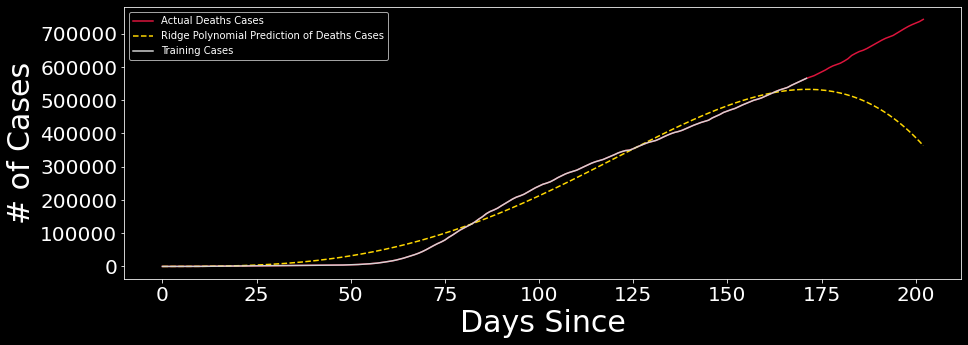

In [ ]:

plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Deaths Cases',
         color = 'crimson')
plt.plot(y,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Deaths Cases',
         linestyle = "dashed",
         color = 'gold')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
#plt.grid()
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10, 100];
gamma = [0.01, 0.1, 1];
epsilon = [0.01, 0.1, 1];
shrinking = [True, False];
svm_grid = {'kernel' :kernel,
           'C' : c,
           'gamma':gamma,
           'epsilon': epsilon,
           'shrinking': shrinking}
svm = SVR();

svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv=3,
                               return_train_score = True)


svm_search.fit(y_train, X_train) # note how y_train had to be put first
print(svm_search.best_params_)

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.1, 'C': 0.01}


In [ ]:
y_pred_test = svm_search.predict(y_test)
# predict for the test days (future)

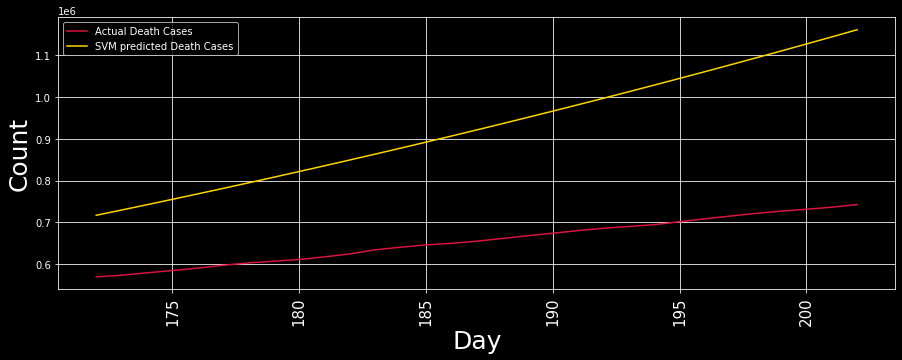

MAE: 272119.2133294845
MSE: 80460260851.1718
r2_score: -3.5849973980838348
RMSE: 283655.1794894142


In [ ]:
plt.style.use("dark_background");
plt.figure(figsize = [15,5]);

# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Death Cases",
         color = 'crimson')

# plotting the predicited values for the future days
plt.plot(y_test,
         y_pred_test,
         label = "SVM predicted Death Cases",
         color = 'gold')

plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(y_pred_test, X_test))
print('MSE:',mean_squared_error(y_pred_test, X_test))
print('r2_score:',r2_score(y_pred_test, X_test))
print('RMSE:', sqrt(mean_squared_error (y_pred_test, X_test)))

In [ ]:
y_pred = svm_search.predict(y)

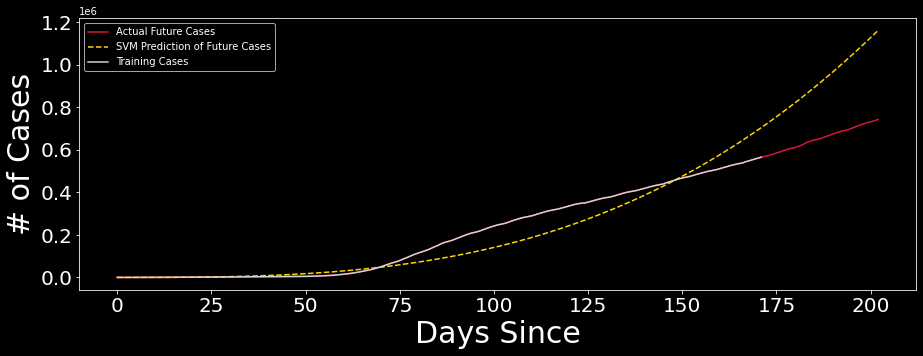

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y,
         X,
         label = 'Actual Future Cases',
         color = 'crimson')

plt.plot(y,
         y_pred,
         label = 'SVM Prediction of Future Cases',
         linestyle = "dashed",
         color = 'gold')

plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'lightgrey')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

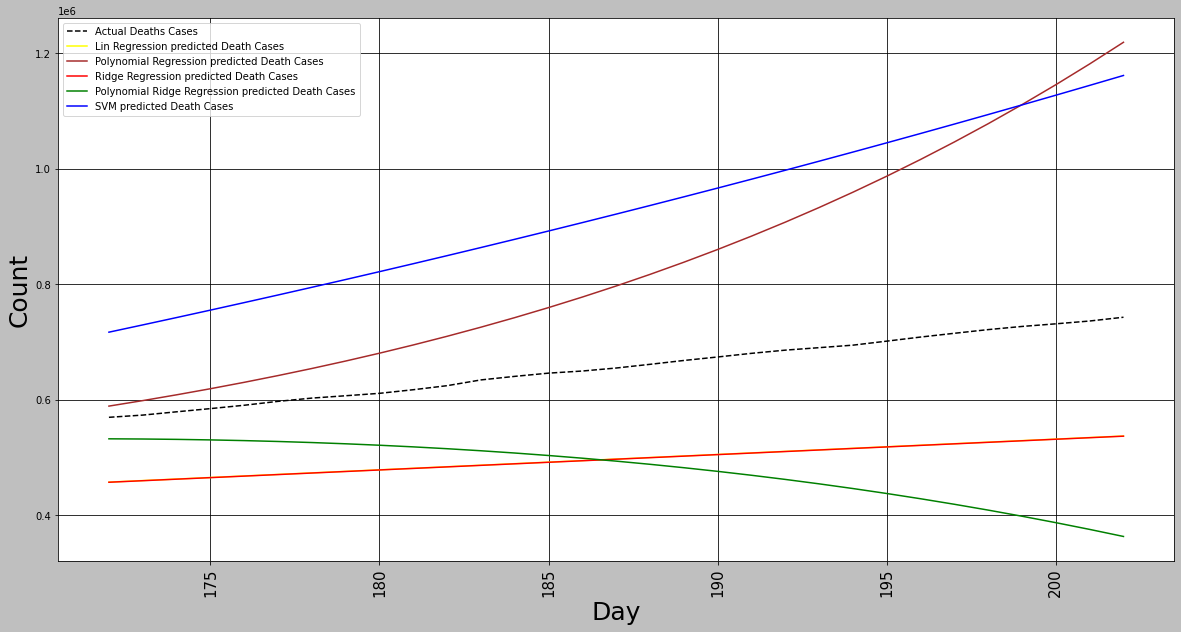

In [ ]:
plt.style.use("grayscale");
plt.figure(figsize = [20,10]);
# plotting the actual values for the future days
plt.plot(y_test,
         X_test,
         label = "Actual Deaths Cases",
         color = 'black',
         linestyle = "dashed"

         )
# plotting the predicited values for the future days
plt.plot(y_test,
         test_lin_pred,
         label = "Lin Regression predicted Death Cases",
         color = 'yellow')
plt.plot(y_test,
         test_linear_pred,
         label = "Polynomial Regression predicted Death Cases",
         color = 'brown')
plt.plot(y_test,
         y_test_ridge_pred,
         label = "Ridge Regression predicted Death Cases",
         color = 'red')

plt.plot(y_test,
         test_poly_bayesian_pred,
         label = "Polynomial Ridge Regression predicted Death Cases",
         color = 'green')
plt.plot(y_test,
         y_pred_test,
         label = "SVM predicted Death Cases",
         color = 'blue')


plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

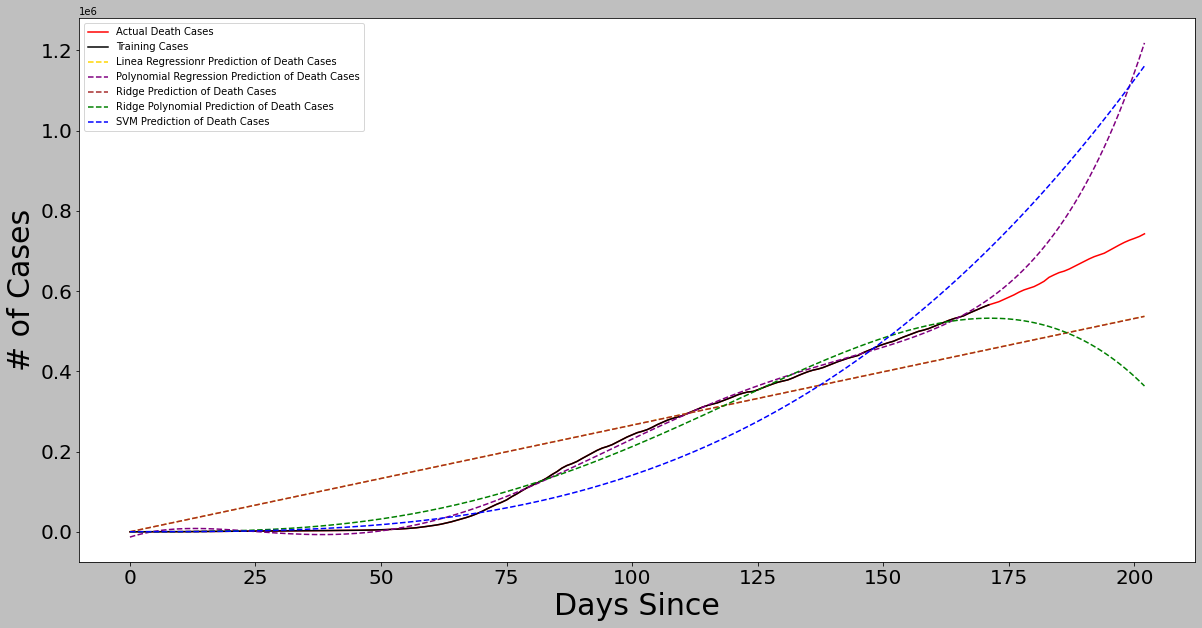

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(y,
         X,
         label = 'Actual Death Cases',
         color = 'red')
plt.plot(y_train,
         X_train,
         label = 'Training Cases',
         color = 'black')
plt.plot(y,
         lin_pred,
         label = 'Linea Regressionr Prediction of Death Cases',
         linestyle = "dashed",
         color = 'gold')
plt.plot(y,
         linear_pred,
         label = 'Polynomial Regression Prediction of Death Cases',
         linestyle = "dashed",
         color = 'purple')
plt.plot(y,
         y_ridge_pred,
         label = 'Ridge Prediction of Death Cases',
         linestyle = "dashed",
         color = 'brown')
plt.plot(y,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Death Cases',
         linestyle = "dashed",
         color = 'green')
plt.plot(y,
         y_pred,
         label = 'SVM Prediction of Death Cases',
         linestyle = "dashed",
         color = 'blue')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
#Lin Regression
print('MAE:', mean_absolute_error (test_lin_pred, X_test))
print('MSE:', mean_squared_error  (test_lin_pred, X_test))
print('r2_score:', r2_score  (test_lin_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_lin_pred, X_test)))
#polynomial regression
print('MAE:', mean_absolute_error(test_linear_pred, X_test))
print('MSE:',mean_squared_error(test_linear_pred, X_test))
print('r2_score:',r2_score(test_linear_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_linear_pred, X_test)))
#Ridge regression
print('MAE:', mean_absolute_error (y_test_ridge_pred, X_test))
print('MSE:', mean_squared_error  (y_test_ridge_pred, X_test))
print('r2_score:', r2_score  (y_test_ridge_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (y_test_ridge_pred, X_test)))
#Poly ridge
print ('MAE:', mean_absolute_error(test_poly_bayesian_pred, X_test))
print ('MSE:', mean_squared_error (test_poly_bayesian_pred, X_test))
print('r2_score:',r2_score(test_poly_bayesian_pred, X_test))
print('RMSE:', sqrt(mean_squared_error (test_poly_bayesian_pred, X_test)))
#SVM
print('MAE:', mean_absolute_error(y_pred_test, X_test))
print('MSE:',mean_squared_error(y_pred_test, X_test))
print('r2_score:',r2_score(y_pred_test, X_test))
print('RMSE:', sqrt(mean_squared_error (y_pred_test, X_test)))


MAE: 158122.25295271954
MSE: 25829056460.646404
r2_score: -44.6535594800854
RMSE: 160714.20740135704
MAE: 179182.45242465535
MSE: 50368957781.42736
r2_score: -0.45008795621912
RMSE: 224430.2960418387
MAE: 158395.88888515244
MSE: 25916418921.005657
r2_score: -44.85842826274409
RMSE: 160985.7724179552
MAE: 178009.1754650604
MSE: 42247116077.51375
r2_score: -15.02671868279036
RMSE: 205541.03258841956
MAE: 272119.2133294845
MSE: 80460260851.1718
r2_score: -3.5849973980838348
RMSE: 283655.1794894142
